# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Laboratorio 2: Series de Tiempo

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169

**Curso:** Data Science  
**Sección:** 10  

---

Guatemala, 1 de agosto de 2024


# 📚Dataset: CONSUMO-2024-05.xlsx  

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.api as sm
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline


In [35]:

def combineDieselColumns(csvPath):
    print("📂 Iniciando la combinación de las columnas de Diesel...")

    try:
        # Leer el archivo CSV en un DataFrame
        df = pd.read_csv(csvPath)
        print(f"✅ Archivo cargado: {csvPath}")
    except Exception as e:
        print(f"❌ Error al cargar {csvPath}: {e}")
        return None
    
    if 'Diesel alto azufre' not in df.columns or 'Diesel bajo azufre' not in df.columns:
        print("❌ Las columnas 'Diesel alto azufre' o 'Diesel bajo azufre' no existen en el archivo CSV.")
        return None

    # Crear la nueva columna 'Diesel'
    df['Diesel'] = df['Diesel alto azufre'].replace(0, pd.NA).combine_first(df['Diesel bajo azufre'].replace(0, pd.NA))
    
    # Eliminar las columnas originales si es necesario
    # df.drop(['Diesel alto azufre', 'Diesel bajo azufre'], axis=1, inplace=True)
    
    print("🏁 Combinación de columnas completada.")
    return df

csvPath = 'Consumo/CONSUMO-2024-05.csv'
dataConsumo = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Consumo/CONSUMO-2024-05.csv
🏁 Combinación de columnas completada.


In [36]:
dataConsumo = dataConsumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataConsumo['Fecha'] = pd.to_datetime(dataConsumo['Fecha'])
dataConsumo.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.20,308156.82,634667.06,194410.476190
1,2000-02-01,205530.96,307766.31,642380.66,174710.552381
2,2000-03-01,229499.56,331910.29,699807.25,189234.066667
3,2000-04-01,210680.40,315648.08,586803.98,174330.607143
4,2000-05-01,208164.34,319667.97,656948.2,191745.147619


In [37]:
#plt.figure(figsize=(12, 8))

#for i, column in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo'], 1):
#    plt.subplot(2, 2, i)
#    sns.histplot(dataConsumo[column], kde=True)
#    plt.title(f'Distribución de {column}')
#    plt.xlabel(column)

#plt.tight_layout()
#plt.show()

Shape of your Data Set loaded: (293, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,160741.900000,894533.140000,No issue
Gasolina superior,float64,0.000000,NA,300242.781667,768102.830000,Column has a high correlation with ['Gasolina regular']. Consider dropping one of them.
Diesel,float64,0.000000,NA,507662.650000,1463008.430000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior']. Consider dropping one of them."
Gas licuado de petróleo,float64,0.000000,NA,167818.137897,588892.160000,"Column has a high correlation with ['Gasolina regular', 'Gasolina superior', 'Diesel']. Consider dropping one of them."


Number of All Scatter Plots = 10


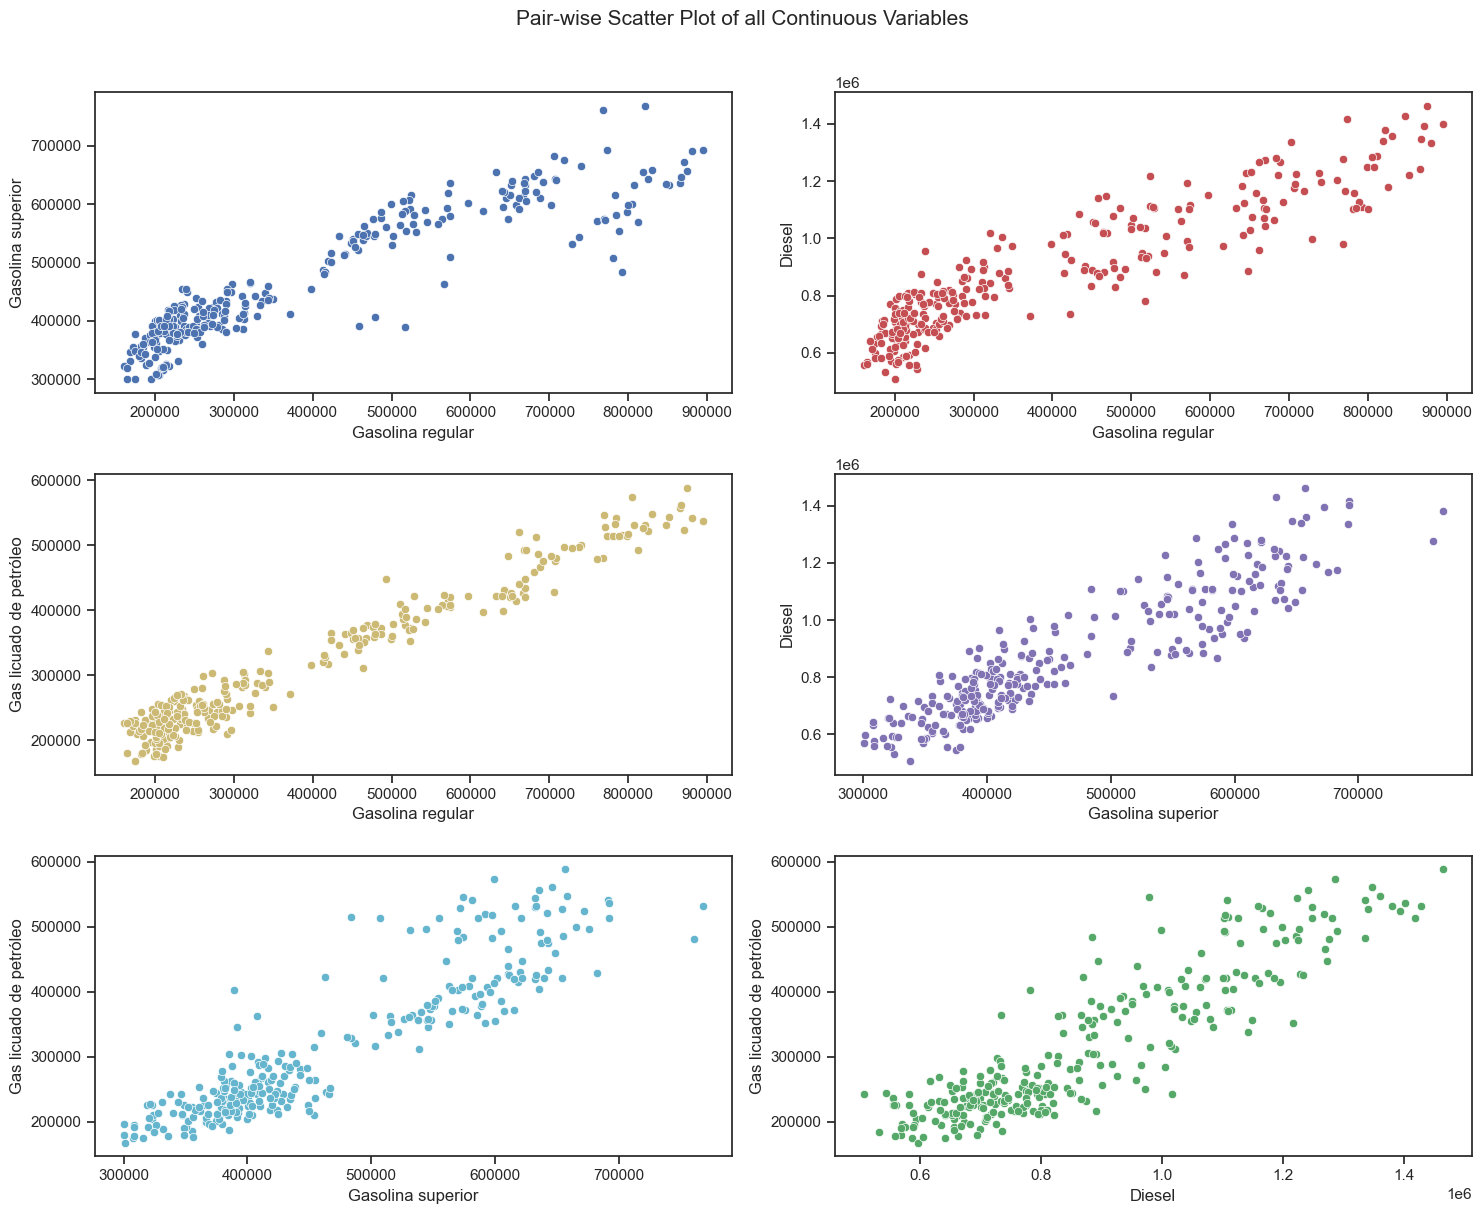

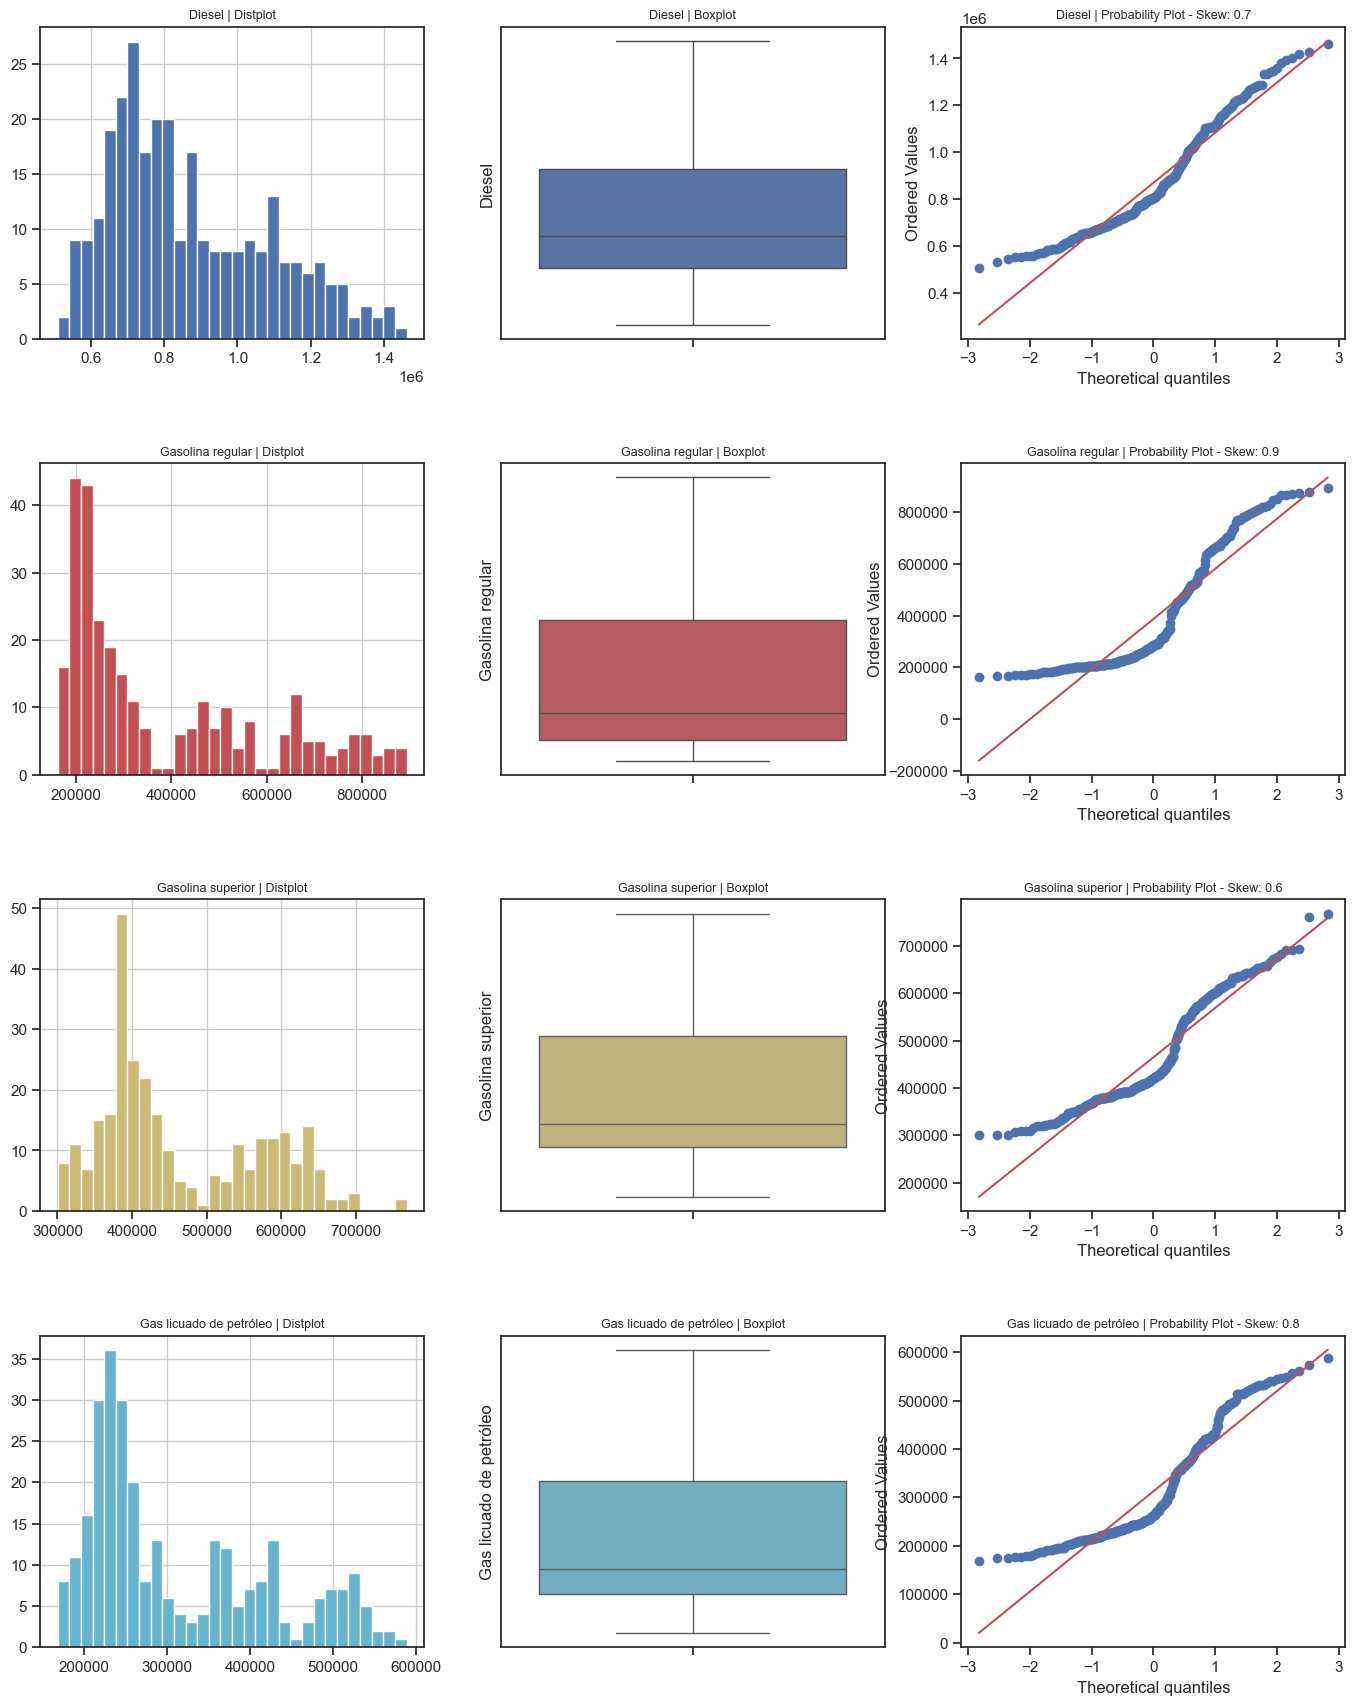

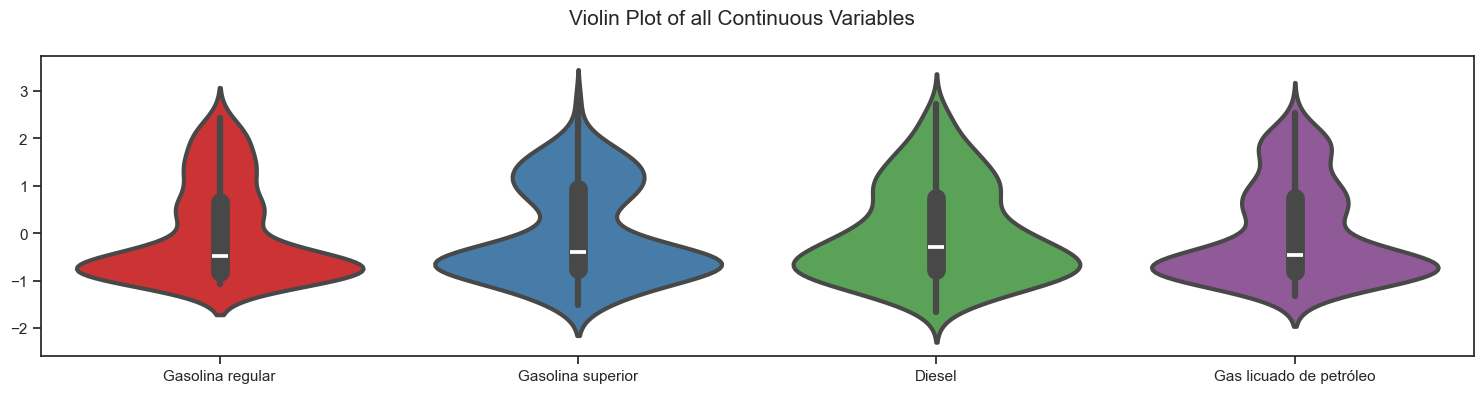

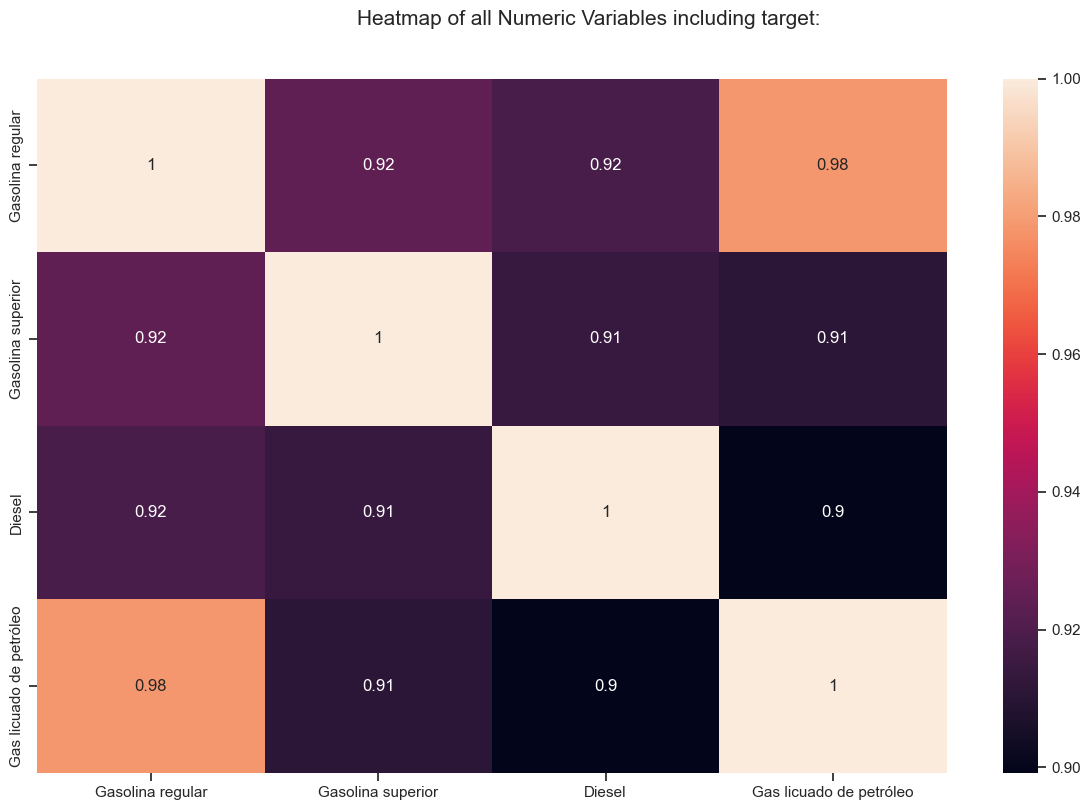

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2000-01-01,202645.200000,308156.820000,6.346671e+05,194410.476190
1,2000-02-01,205530.960000,307766.310000,6.423807e+05,174710.552381
2,2000-03-01,229499.560000,331910.290000,6.998072e+05,189234.066667
3,2000-04-01,210680.400000,315648.080000,5.868040e+05,174330.607143
4,2000-05-01,208164.340000,319667.970000,6.569482e+05,191745.147619
5,2000-06-01,195088.740000,300347.700000,5.709199e+05,196321.933333
6,2000-07-01,204556.770000,308305.930000,5.764360e+05,192344.502381
7,2000-08-01,218388.510000,323011.860000,5.937708e+05,203727.080952
8,2000-09-01,213906.960000,326455.720000,5.901454e+05,194565.097619
9,2000-10-01,213606.650000,323843.630000,6.411134e+05,210261.826190


In [38]:
csvPath = 'Consumo/dataConsumo.csv'
dataConsumo.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

In [39]:
#report = sv.analyze(dataConsumo)
#report.show_html('Consumo/EDAConsumo.html') 

# 📚Dataset: IMPORTACION-VOLUMEN-2024-05.xlsx  

In [40]:
csvPath = 'Importacion/IMPORTACION-VOLUMEN-2024-05.csv'

dataImportacion = combineDieselColumns(csvPath)

📂 Iniciando la combinación de las columnas de Diesel...
✅ Archivo cargado: Importacion/IMPORTACION-VOLUMEN-2024-05.csv
🏁 Combinación de columnas completada.


In [41]:
dataImportacion = dataImportacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]
dataImportacion['Fecha'] = pd.to_datetime(dataImportacion['Fecha'])
dataImportacion.head()

,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,566101.99,194065.738095
1,2001-02-01,123115.99,243091.07,489525.8,170703.380952
2,2001-03-01,161726.42,312084.38,575559.68,161837.371429
3,2001-04-01,127338.74,285054.89,437745.42,163048.642857
4,2001-05-01,168730.19,300913.67,552609.13,171518.861905


Shape of your Data Set loaded: (281, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Fecha']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Fecha,object,0.000000,100,,,Possible ID column: drop before modeling step.
Gasolina regular,float64,0.000000,NA,81015.300000,987872.050000,No issue
Gasolina superior,float64,0.000000,NA,170292.500000,1227173.530000,Column has 2 outliers greater than upper bound (939346.60) or lower than lower bound(23410.12). Cap them or remove them.
Diesel,float64,0.000000,NA,229764.740000,1595698.560000,No issue
Gas licuado de petróleo,float64,0.000000,NA,100561.466667,1077122.750000,Column has 1 outliers greater than upper bound (1076259.26) or lower than lower bound(-285424.28). Cap them or remove them.


Number of All Scatter Plots = 10


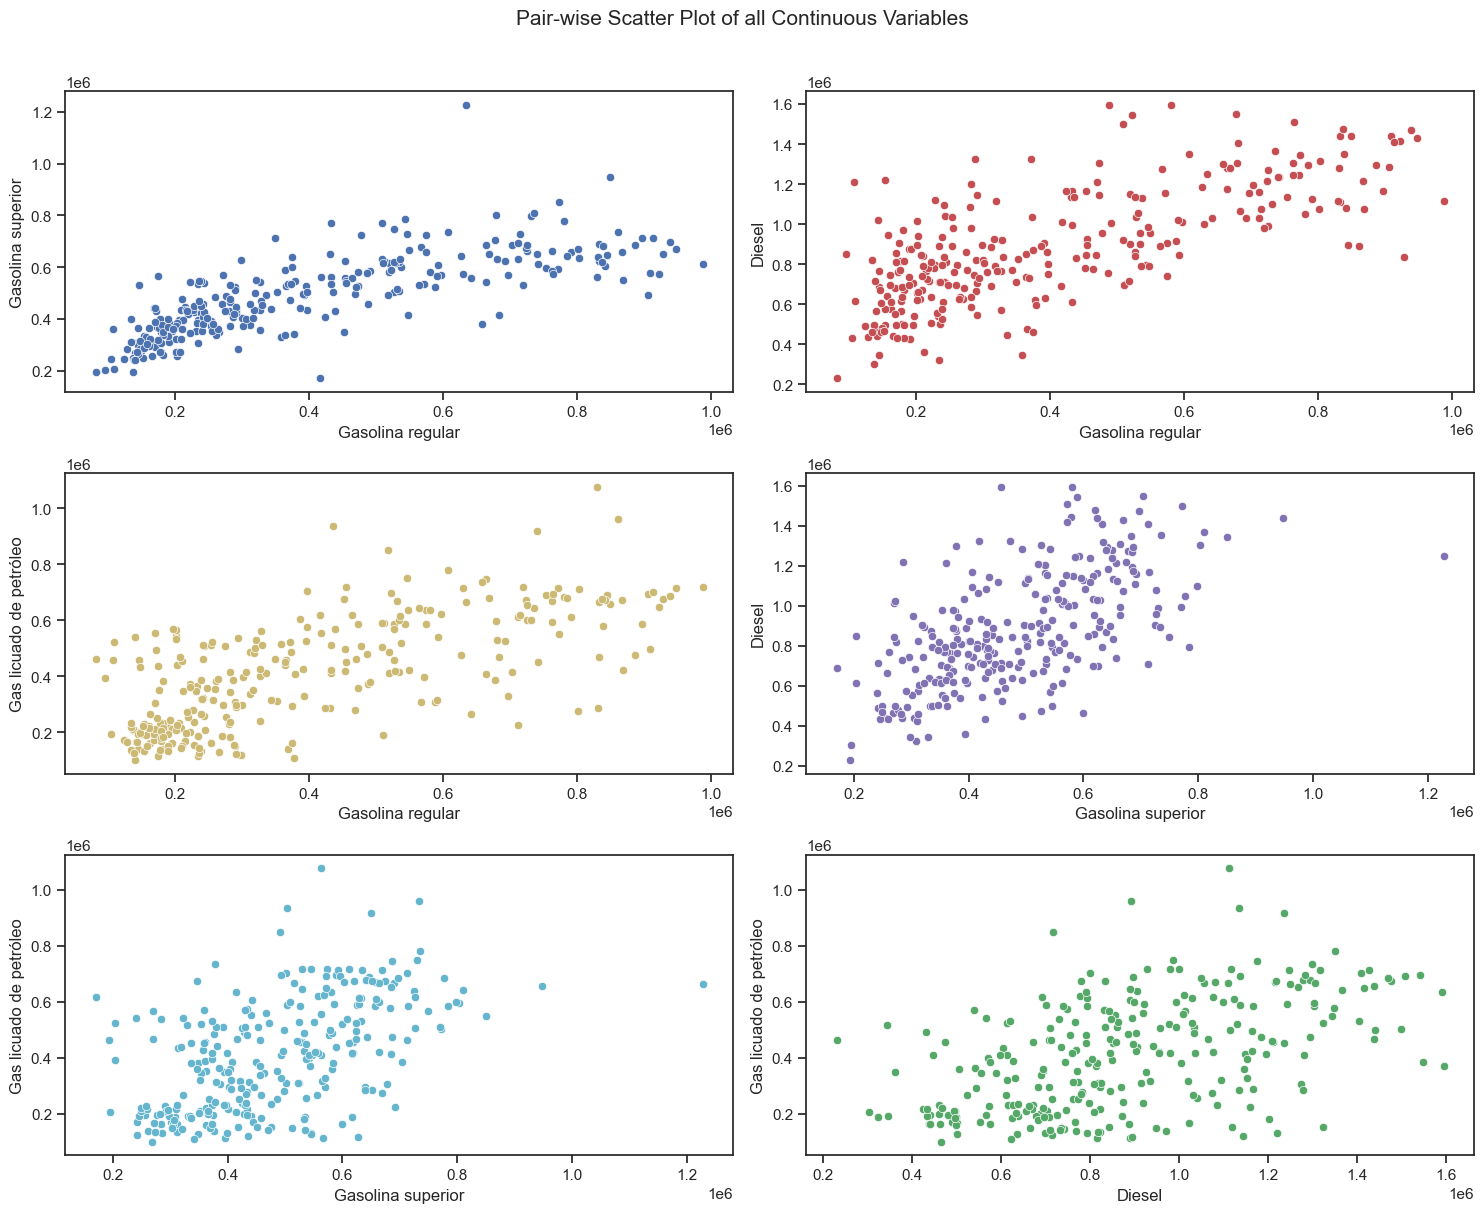

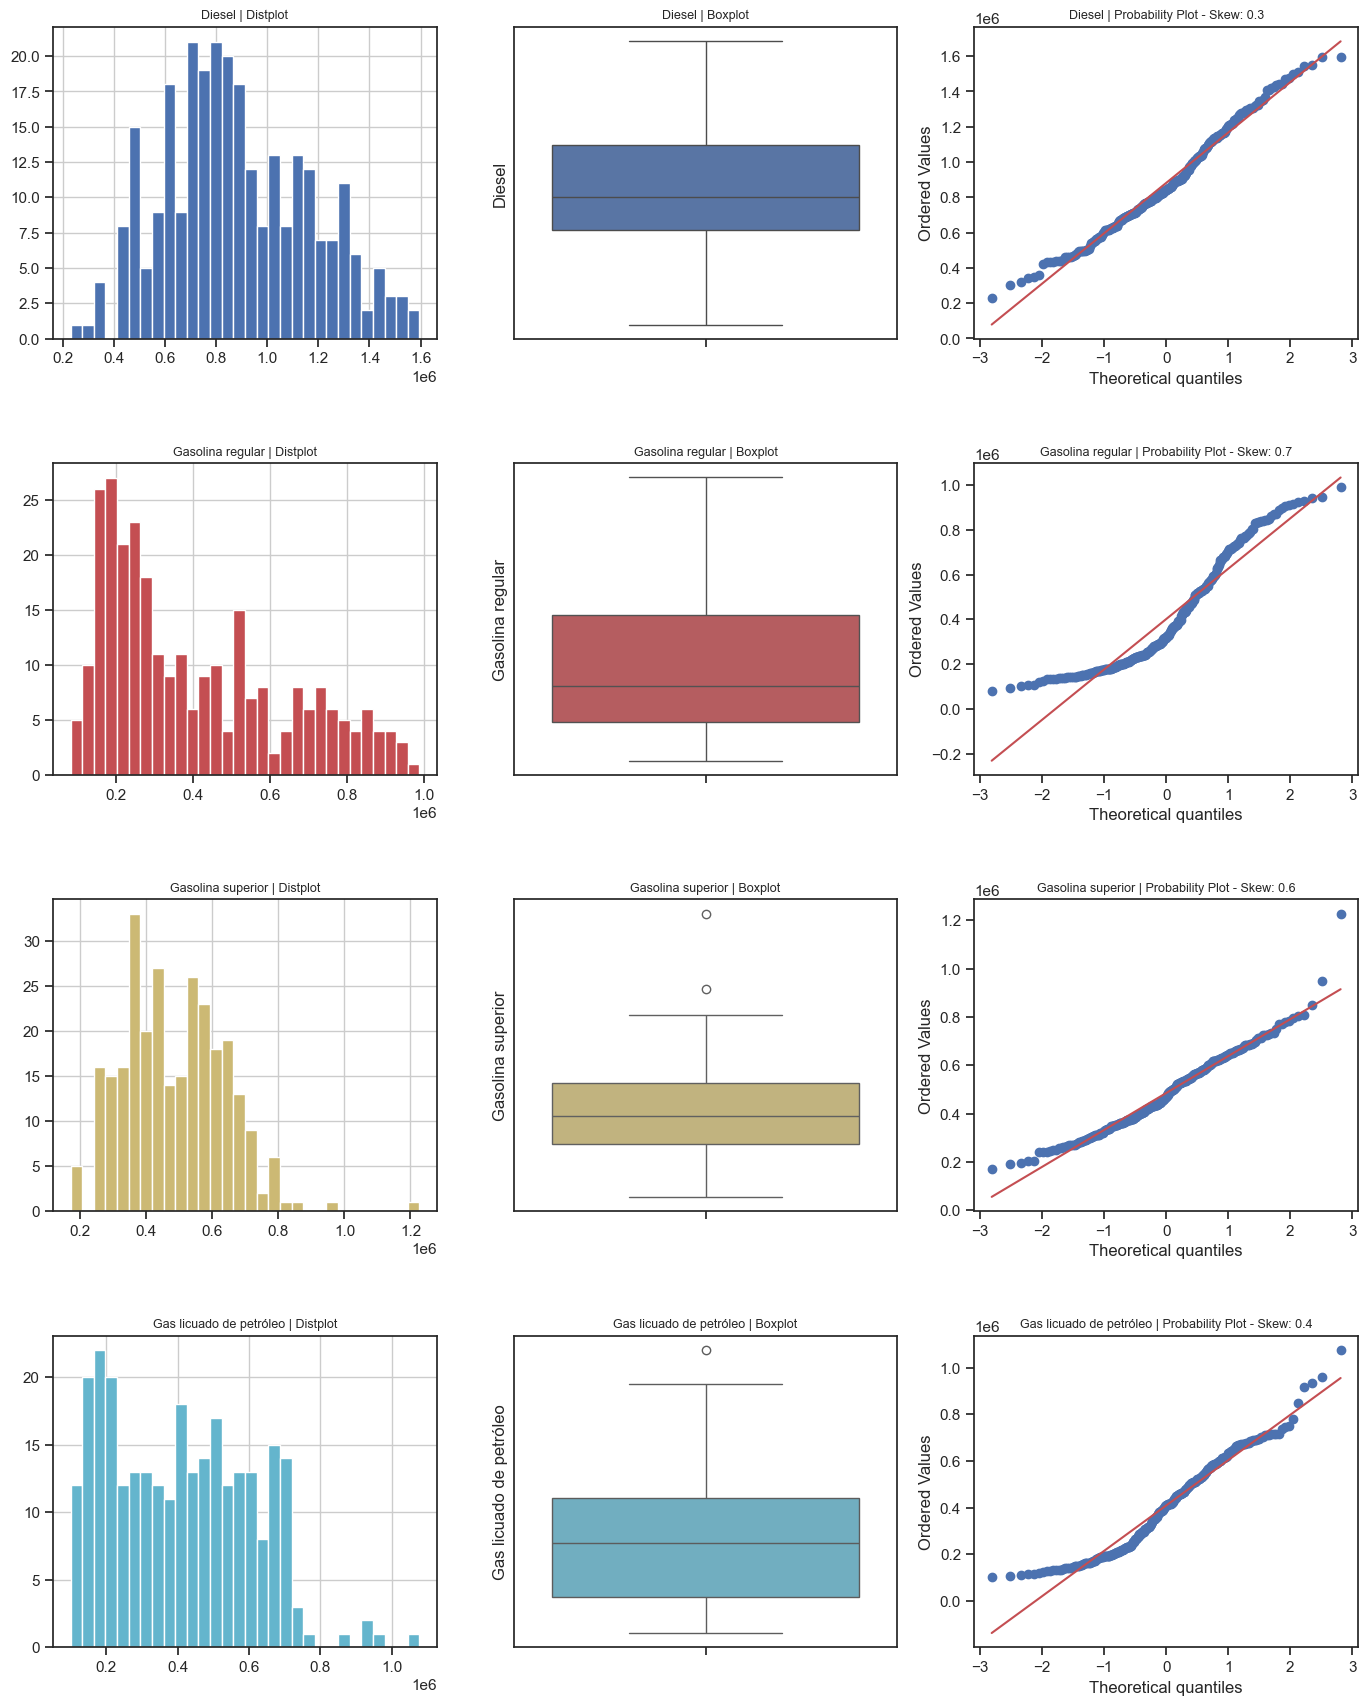

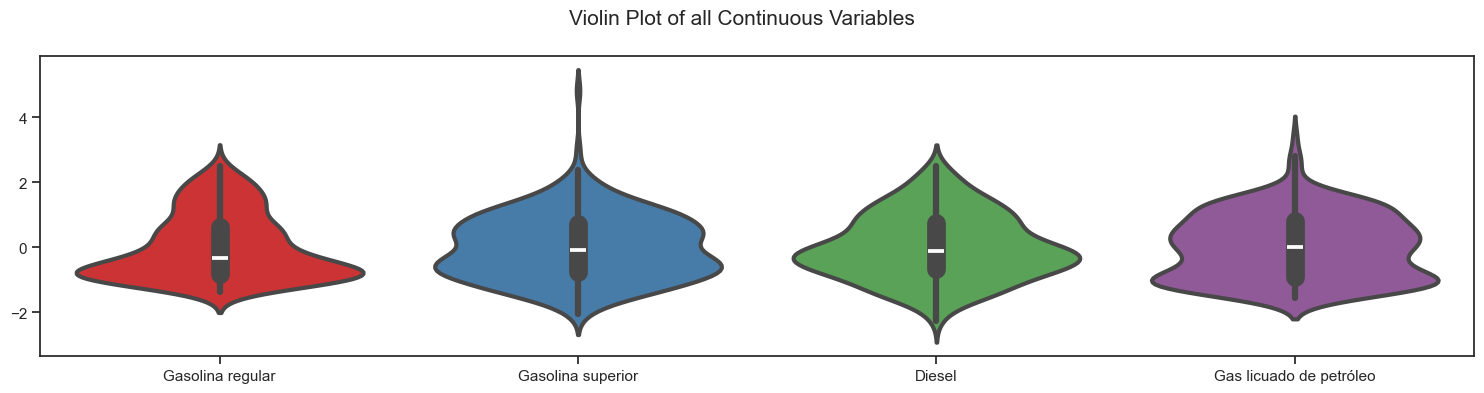

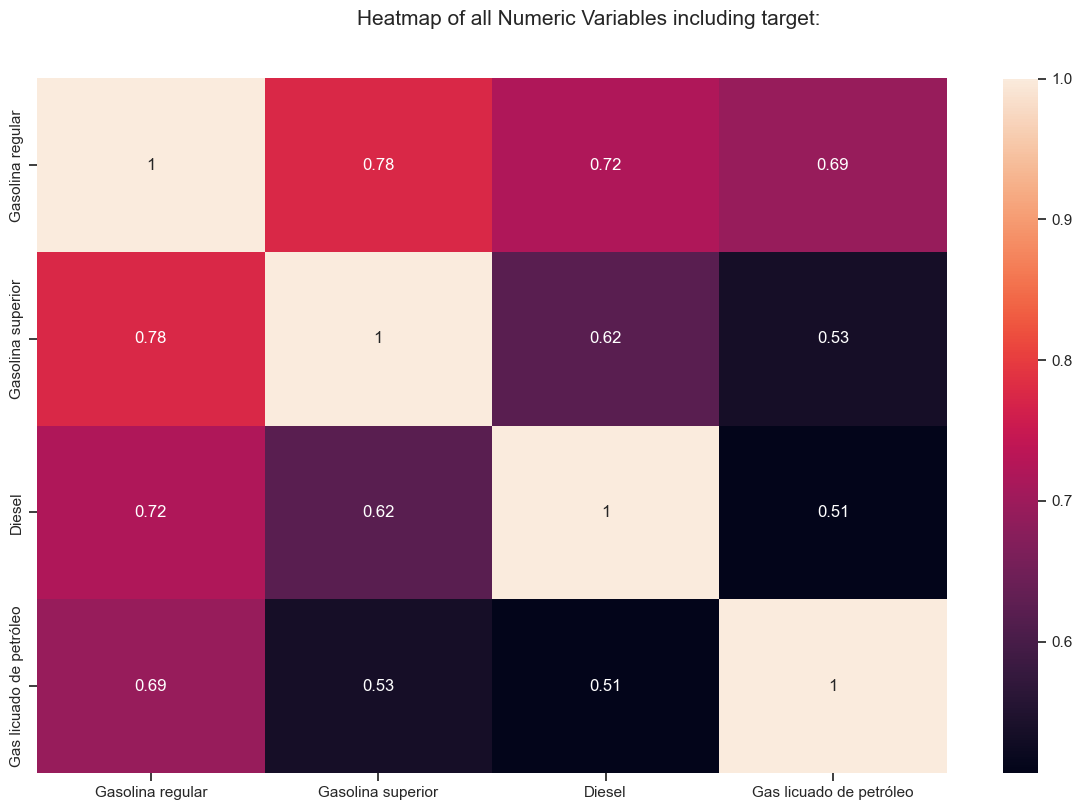

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Fecha,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
0,2001-01-01,177776.500000,373963.960,566101.990,1.940657e+05
1,2001-02-01,123115.990000,243091.070,489525.800,1.707034e+05
2,2001-03-01,161726.420000,312084.380,575559.680,1.618374e+05
3,2001-04-01,127338.740000,285054.890,437745.420,1.630486e+05
4,2001-05-01,168730.190000,300913.670,552609.130,1.715189e+05
5,2001-06-01,152899.090000,333217.190,497855.260,1.900044e+05
6,2001-07-01,136299.130000,195071.860,302350.020,2.060228e+05
7,2001-08-01,139365.070000,268153.260,464159.130,1.005615e+05
8,2001-09-01,233643.750000,308439.070,321952.940,1.868390e+05
9,2001-10-01,141550.220000,305102.280,438989.550,1.638642e+05


In [42]:
csvPath = 'Importacion/dataImportacion.csv'
dataImportacion.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

# 📚Dataset: Precios-Promedio-Nacionales-Diarios-2024-3.xlsx

In [43]:
csvPath = 'PreciosPromedioNacionales/PreciosPromedioNacionales.csv'

dataPrecios = pd.read_csv(csvPath)
print(f"✅ Archivo cargado: {csvPath}")

✅ Archivo cargado: PreciosPromedioNacionales/PreciosPromedioNacionales.csv


In [44]:
dataPrecios = dataPrecios[['FECHA', 'Regular GTQ/GALON', 'Superior GTQ/GALON', 'Diesel GTQ/GALON', 'Glp Cilindro 25Lbs. GTQ/LB']]
dataPrecios['FECHA'] = pd.to_datetime(dataPrecios['FECHA'])
dataPrecios.head()

,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96


Shape of your Data Set loaded: (1305, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['FECHA']
To fix these data quality issues in the dataset, import FixD

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
FECHA,object,0.000000,100,,,Possible ID column: drop before modeling step.
Regular GTQ/GALON,float64,0.000000,NA,21.110000,40.500000,No issue
Superior GTQ/GALON,float64,0.000000,NA,21.910000,43.240000,Column has a high correlation with ['Regular GTQ/GALON']. Consider dropping one of them.
Diesel GTQ/GALON,float64,0.000000,NA,17.610000,41.270000,"Column has a high correlation with ['Regular GTQ/GALON', 'Superior GTQ/GALON']. Consider dropping one of them."
Glp Cilindro 25Lbs. GTQ/LB,float64,0.000000,NA,3.960000,5.880000,No issue


Number of All Scatter Plots = 10


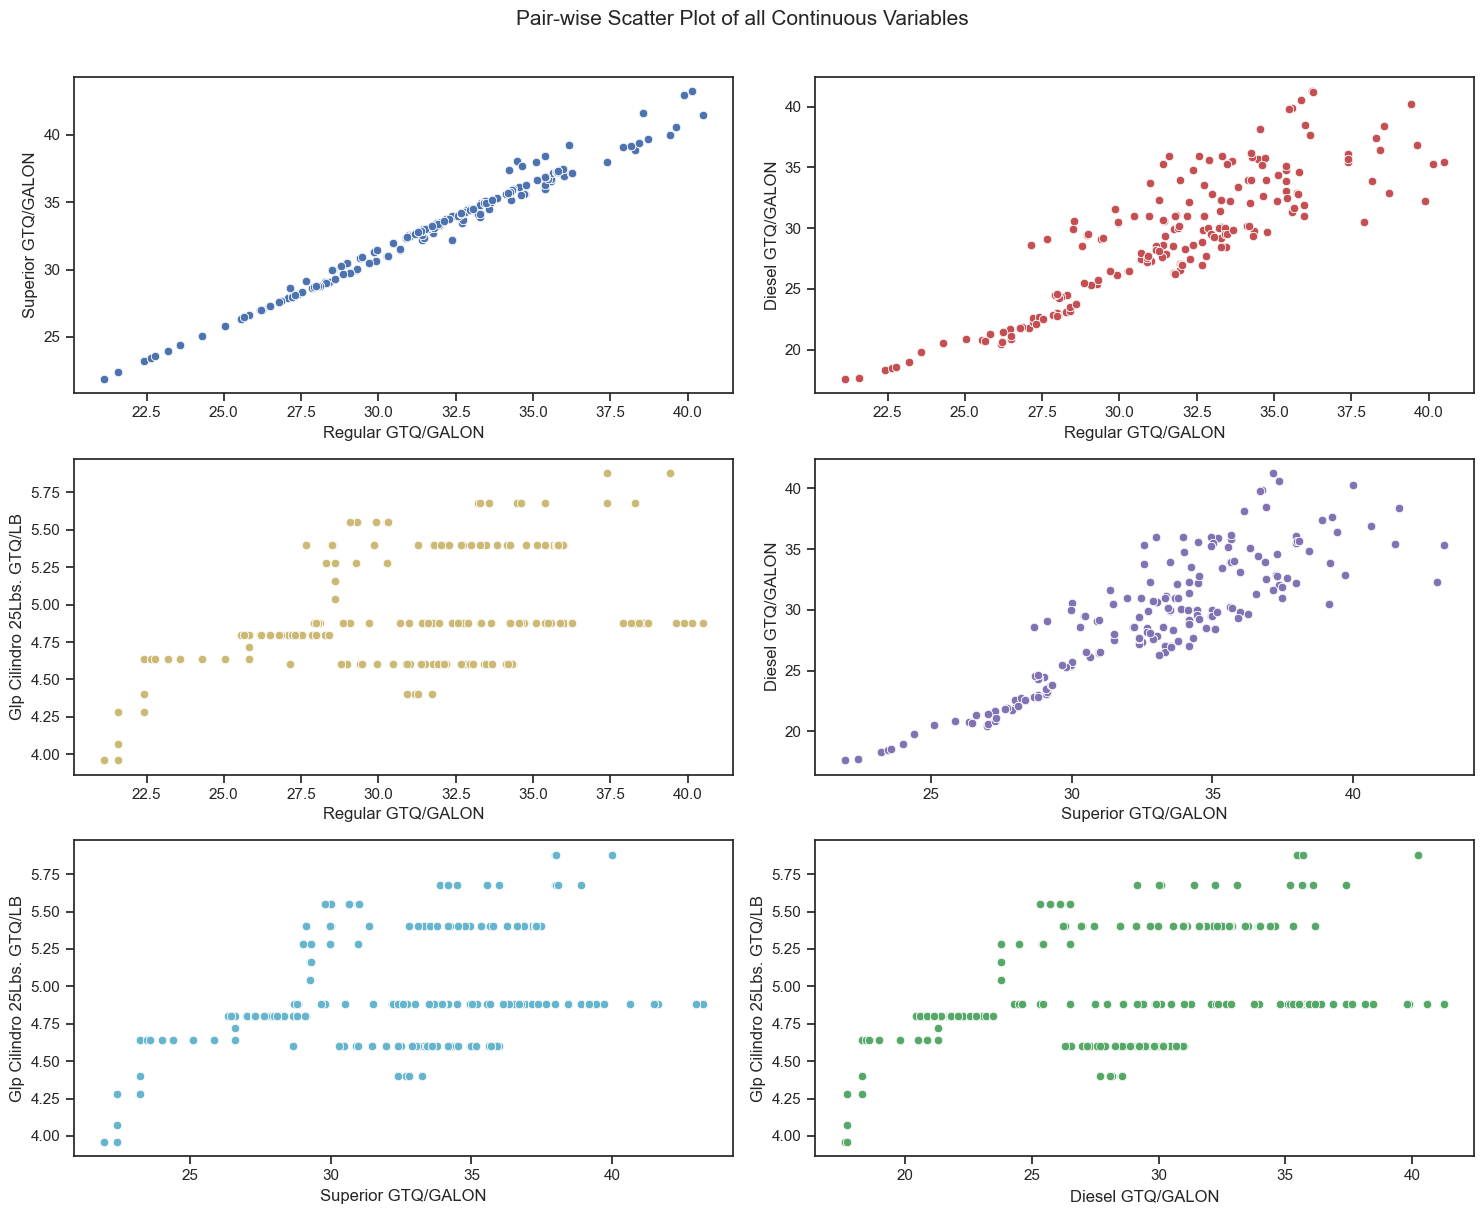

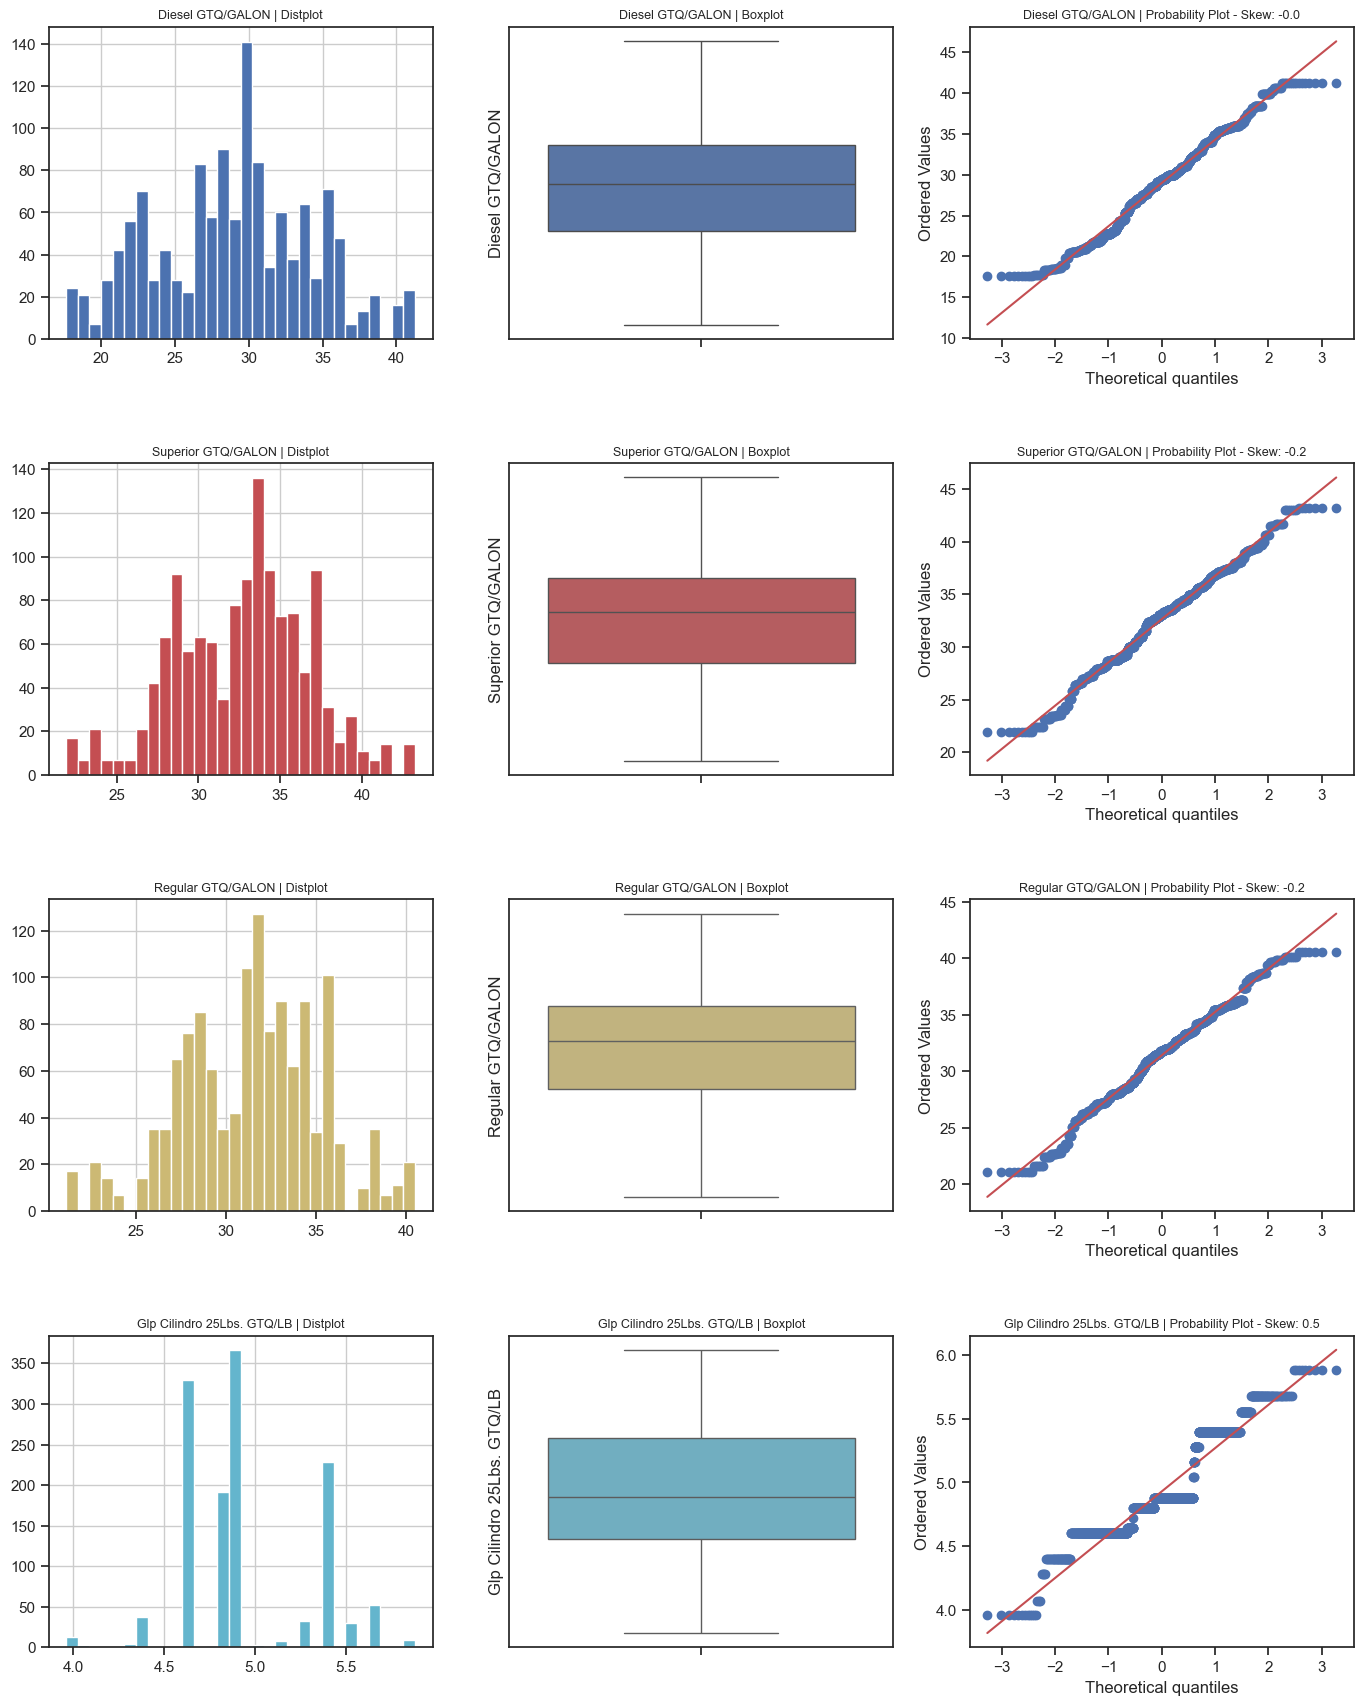

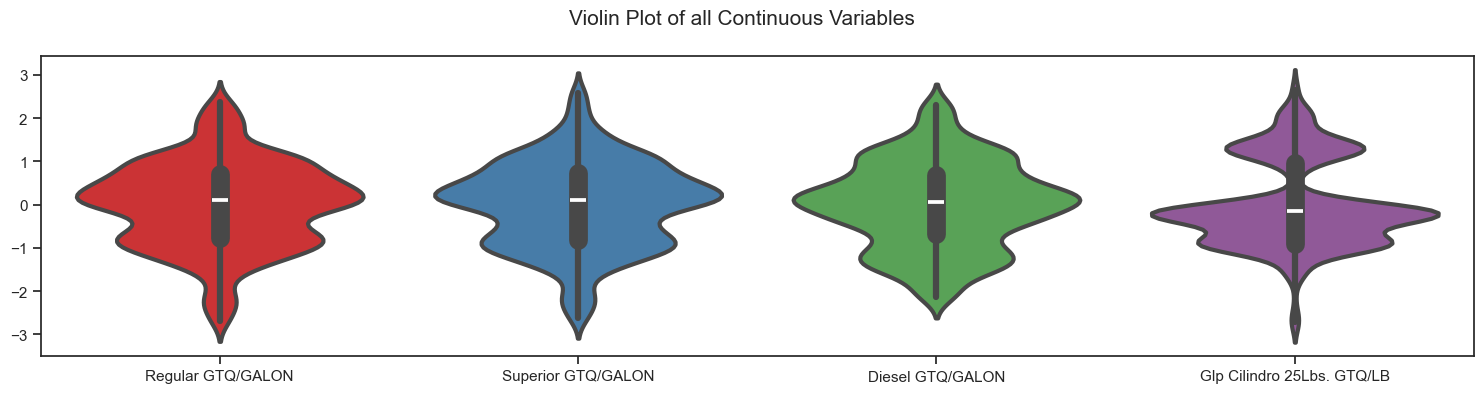

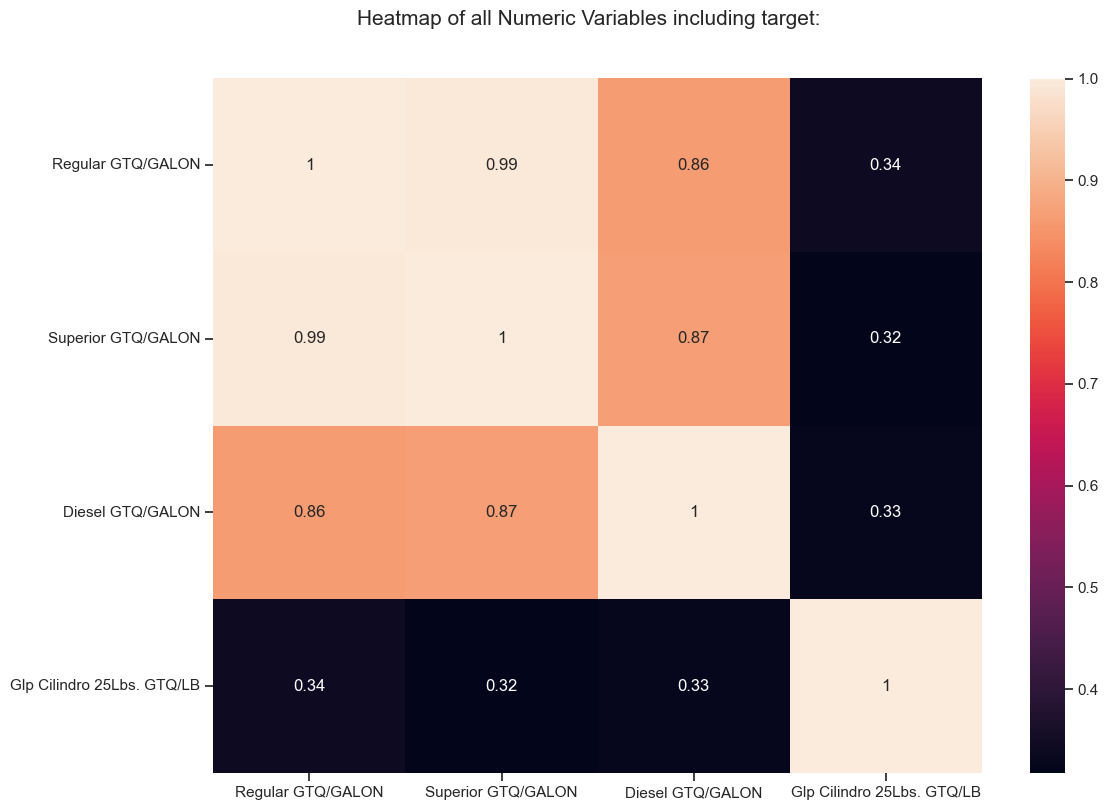

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,FECHA,Regular GTQ/GALON,Superior GTQ/GALON,Diesel GTQ/GALON,Glp Cilindro 25Lbs. GTQ/LB
0,2021-01-01,21.11,21.91,17.61,3.96
1,2021-01-02,21.11,21.91,17.61,3.96
2,2021-01-03,21.11,21.91,17.61,3.96
3,2021-01-04,21.11,21.91,17.61,3.96
4,2021-01-05,21.11,21.91,17.61,3.96
...,...,...,...,...,...
1300,2024-07-24,31.29,32.79,28.09,4.40
1301,2024-07-25,31.29,32.79,28.09,4.40
1302,2024-07-26,31.29,32.79,28.09,4.40
1303,2024-07-27,31.29,32.79,28.09,4.40


In [45]:
csvPath = 'PreciosPromedioNacionales/dataPrecios.csv'
dataPrecios.to_csv(csvPath, index=False)
AV = AutoViz_Class()
AV.AutoViz(csvPath)

# 📚Datasets: Seleccion de series de tiempo.

In [46]:
serieConsumoDiesel = dataConsumo[['Fecha', 'Diesel']]
serieImportacionRegular = dataImportacion[['Fecha', 'Gasolina regular']]
seriePreciosSuper = dataPrecios[['FECHA', 'Superior GTQ/GALON']]

serieConsumoDiesel.set_index('Fecha', inplace=True)
serieConsumoDiesel.sort_index(inplace=True)
serieImportacionRegular.set_index('Fecha', inplace=True)
serieImportacionRegular.sort_index(inplace=True)
seriePreciosSuper.set_index('FECHA', inplace=True)
seriePreciosSuper.sort_index(inplace=True)

### 📝 Datos iniciales sobre las series.

In [47]:
def mostrarInfoSeriesTiempo(consumoDiesel, importacionRegular, preciosSuper):
    print("📊 Información de las series de tiempo:")

    print("\n🔵 Consumo Diesel:")
    print(f"   Inicio: {consumoDiesel.index.min()}")
    print(f"   Fin: {consumoDiesel.index.max()}")
    print(f"   Frecuencia: {consumoDiesel.index.freq}")

    print("\n🟠 Importación Gasolina Regular:")
    print(f"   Inicio: {importacionRegular.index.min()}")
    print(f"   Fin: {importacionRegular.index.max()}")
    print(f"   Frecuencia: {importacionRegular.index.freq}")

    print("\n🟢 Precios Super:")
    print(f"   Inicio: {preciosSuper.index.min()}")
    print(f"   Fin: {preciosSuper.index.max()}")
    print(f"   Frecuencia: {preciosSuper.index.freq}")

mostrarInfoSeriesTiempo(serieConsumoDiesel, serieImportacionRegular, seriePreciosSuper)

📊 Información de las series de tiempo:

🔵 Consumo Diesel:
   Inicio: 2000-01-01 00:00:00
   Fin: 2024-05-01 00:00:00
   Frecuencia: None

🟠 Importación Gasolina Regular:
   Inicio: 2001-01-01 00:00:00
   Fin: 2024-05-01 00:00:00
   Frecuencia: None

🟢 Precios Super:
   Inicio: 2021-01-01 00:00:00
   Fin: 2024-07-28 00:00:00
   Frecuencia: None


### 👀 Visualizacion de las series.

📈 Iniciando la visualización de series de tiempo...
🔵 Graficando Consumo Diesel...


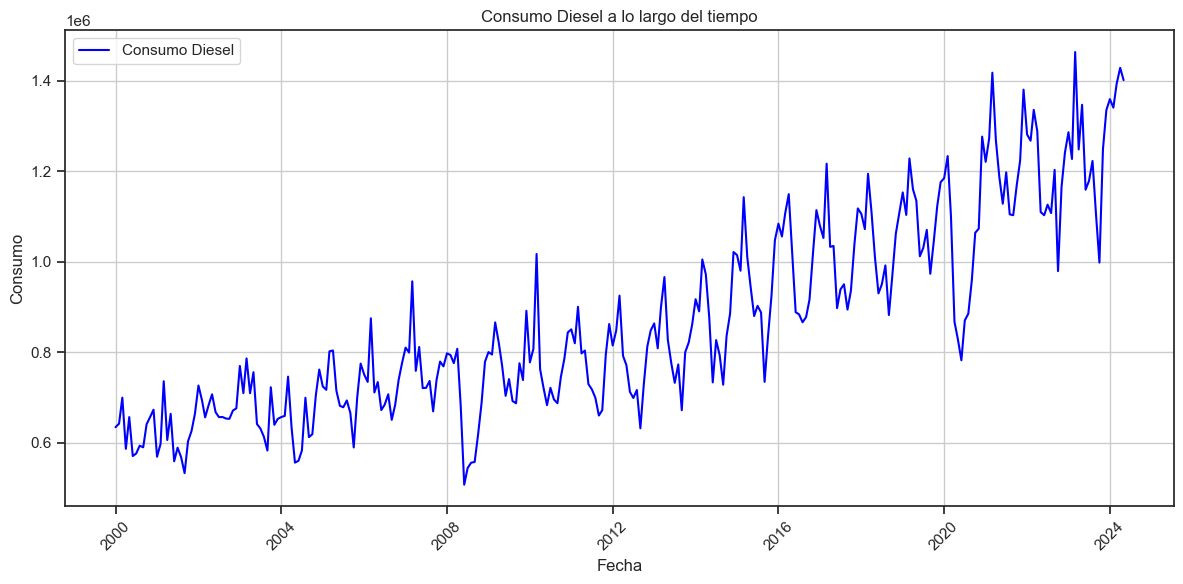

✅ Gráfica de Consumo Diesel completada.
🟠 Graficando Importación Gasolina Regular...


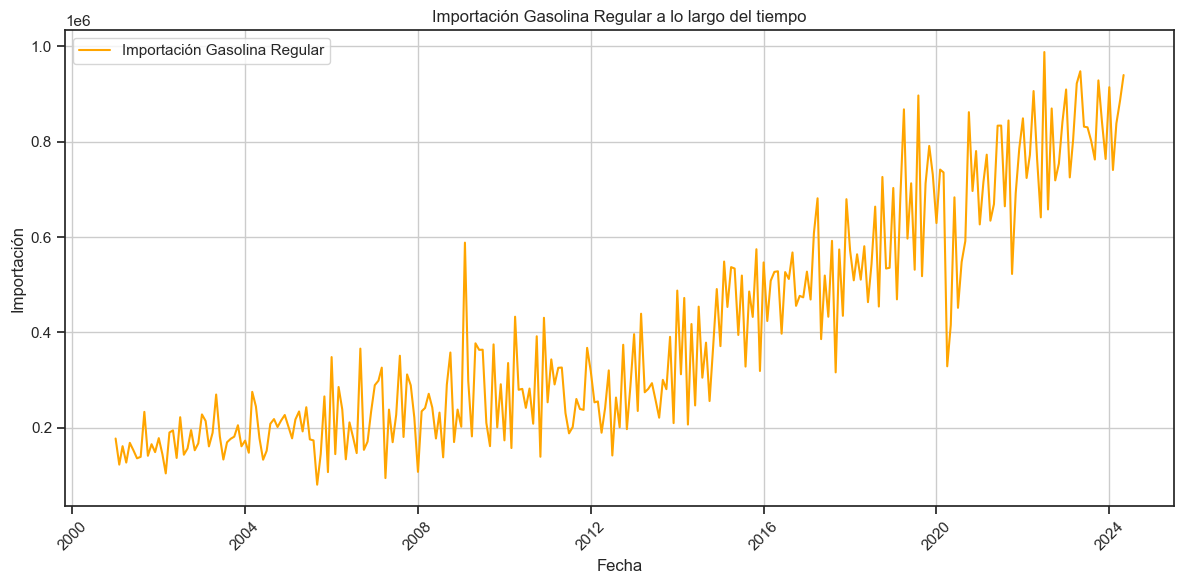

✅ Gráfica de Importación Gasolina Regular completada.
🟢 Graficando Precios Super...


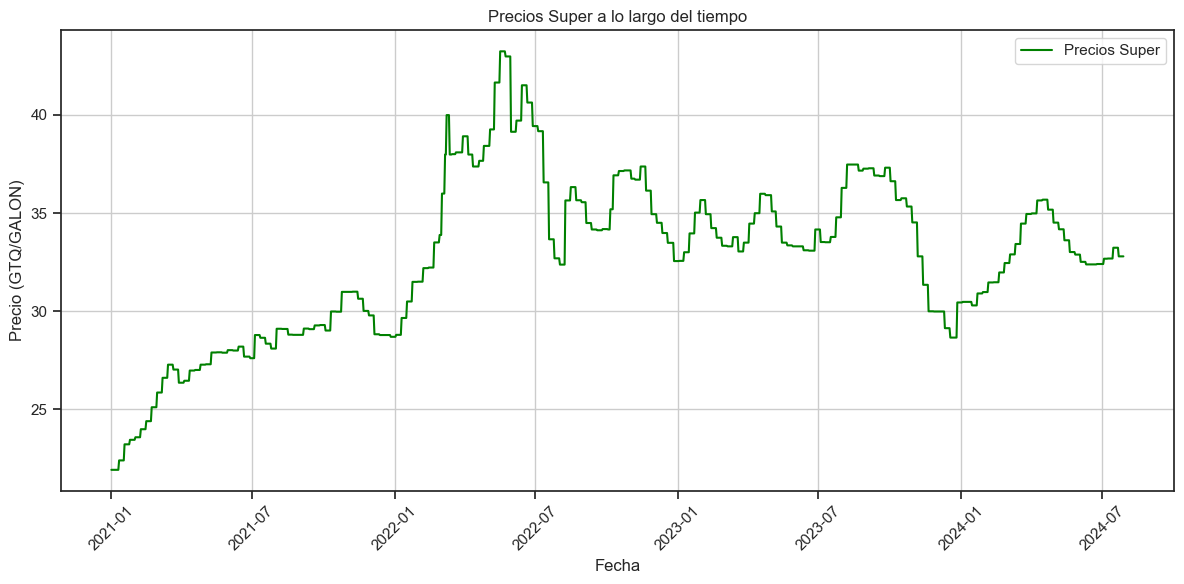

✅ Gráfica de Precios Super completada.


In [48]:
def plotTimeSeries(consumoDiesel, importacionRegular, preciosSuper):
    print("📈 Iniciando la visualización de series de tiempo...")
    
    # Grafica Consumo Diesel
    plt.figure(figsize=(12, 6))
    print("🔵 Graficando Consumo Diesel...")
    plt.plot(consumoDiesel.index, consumoDiesel['Diesel'], label='Consumo Diesel', color='blue')
    plt.title('Consumo Diesel a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Consumo')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Consumo Diesel completada.")

    # Grafica Importación Gasolina Regular
    plt.figure(figsize=(12, 6))
    print("🟠 Graficando Importación Gasolina Regular...")
    plt.plot(importacionRegular.index, importacionRegular['Gasolina regular'], label='Importación Gasolina Regular', color='orange')
    plt.title('Importación Gasolina Regular a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Importación')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Importación Gasolina Regular completada.")

    # Grafica Precios Super
    plt.figure(figsize=(12, 6))
    print("🟢 Graficando Precios Super...")
    plt.plot(preciosSuper.index, preciosSuper['Superior GTQ/GALON'], label='Precios Super', color='green')
    plt.title('Precios Super a lo largo del tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (GTQ/GALON)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("✅ Gráfica de Precios Super completada.")

plotTimeSeries(serieConsumoDiesel, serieImportacionRegular, seriePreciosSuper)

📈 Diesel: Iniciando la descomposición de la serie de tiempo... 


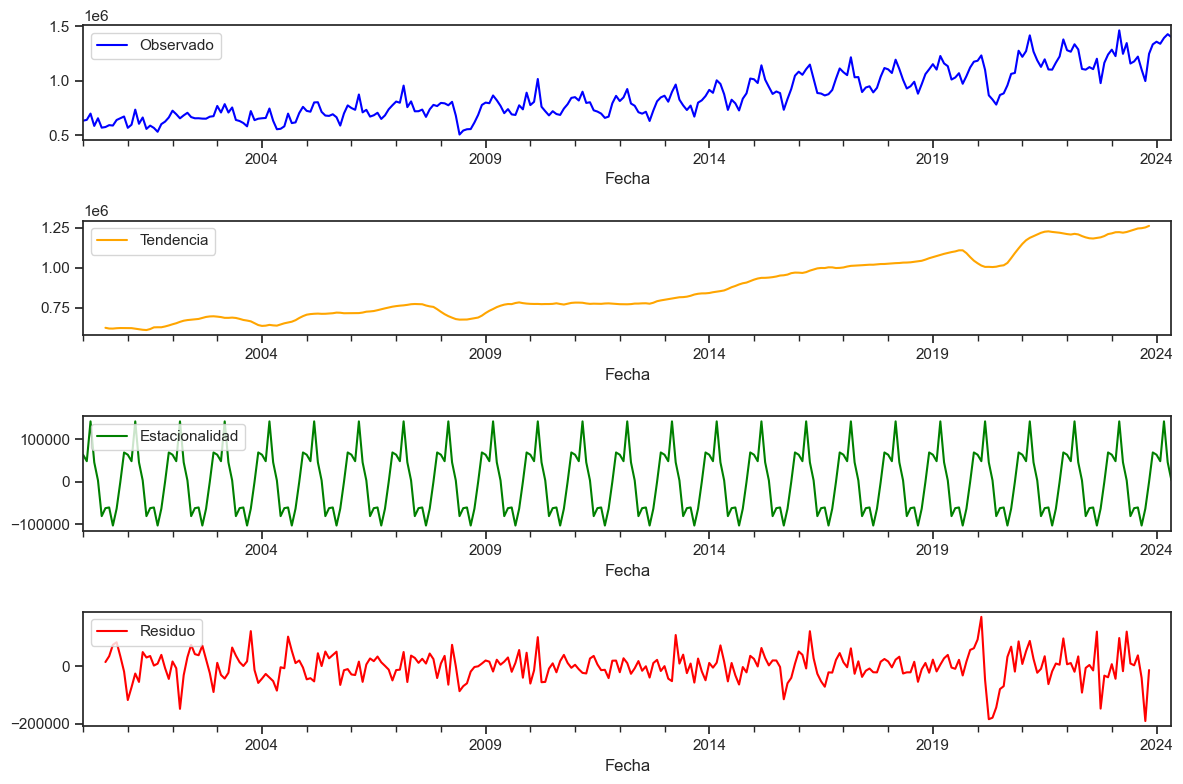

✅ Descomposición completada.
📈 Regular: Iniciando la descomposición de la serie de tiempo... 


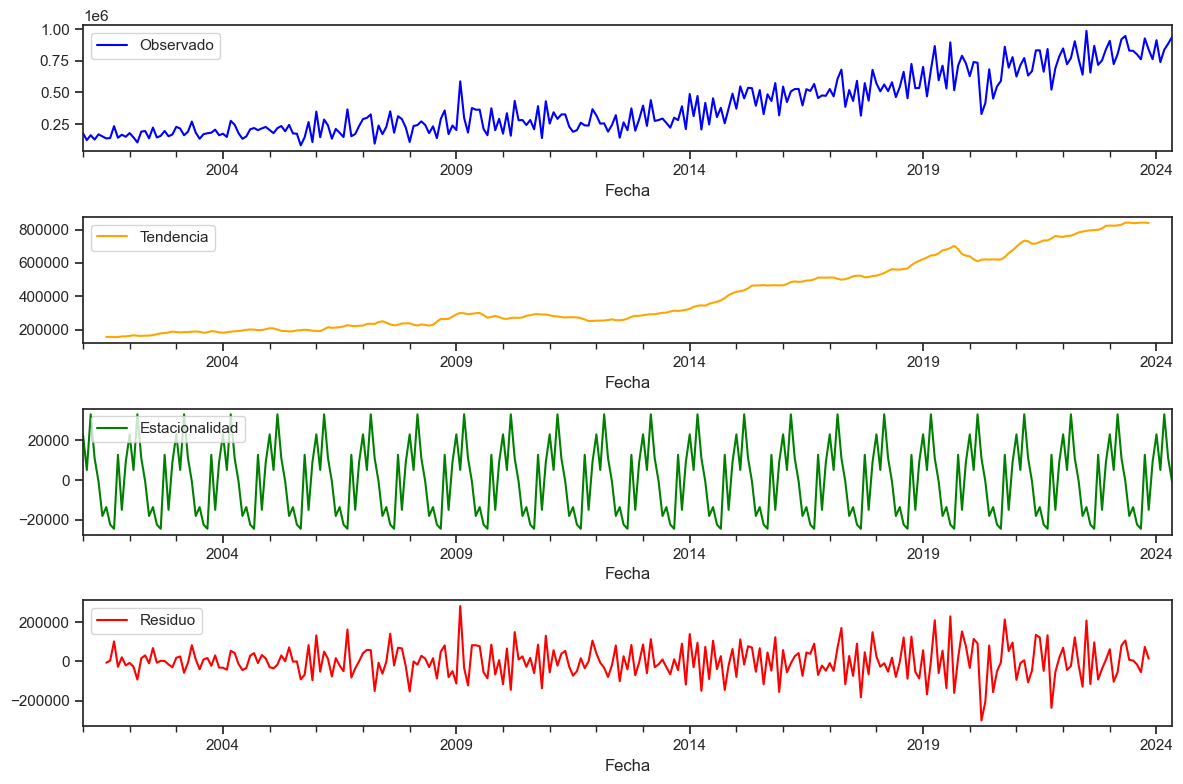

✅ Descomposición completada.
📈 Superior: Iniciando la descomposición de la serie de tiempo... 


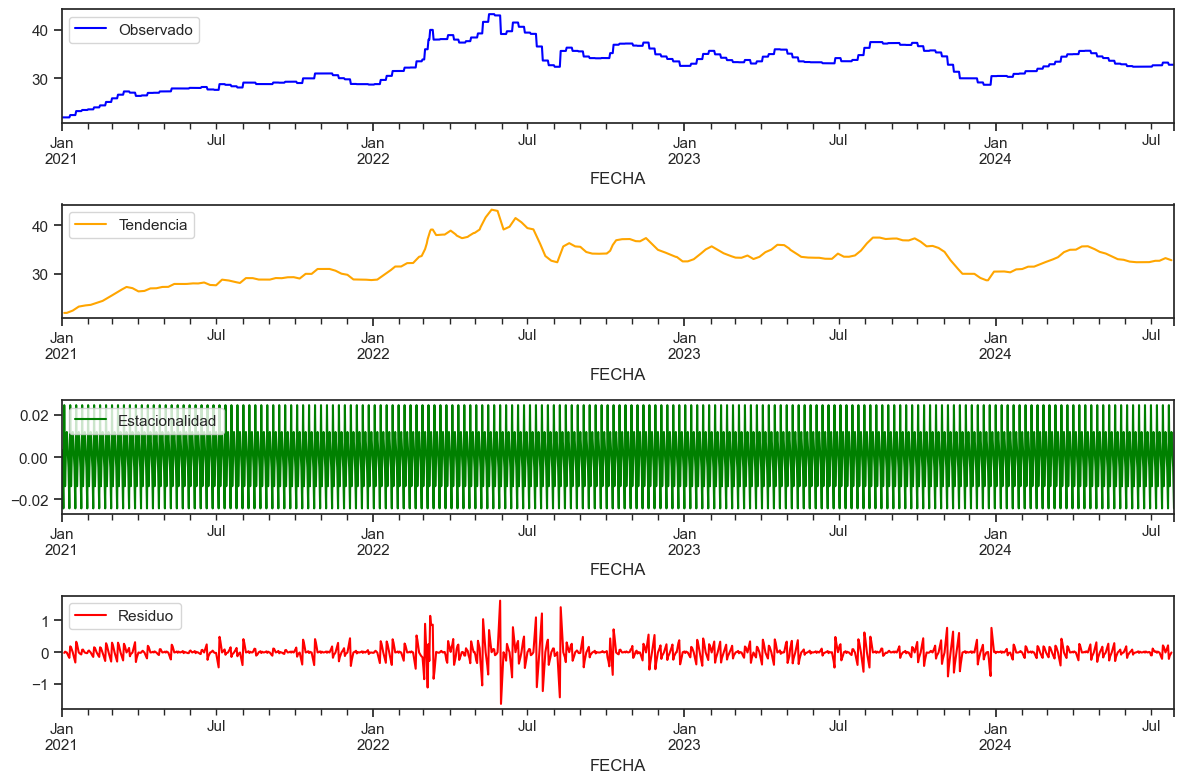

✅ Descomposición completada.


In [49]:
def descomponerSerieTiempo(serieTiempo, descripcion):
    print(f"📈 {descripcion}: Iniciando la descomposición de la serie de tiempo... ")
    
    # Descomposición de la serie
    descomposicion = sm.tsa.seasonal_decompose(serieTiempo, model='additive')
    
    # Graficar los componentes
    plt.figure(figsize=(12, 8))
    descomposicion.observed.plot(ax=plt.subplot(411), label='Observado', color='blue')
    plt.legend(loc='upper left')
    
    descomposicion.trend.plot(ax=plt.subplot(412), label='Tendencia', color='orange')
    plt.legend(loc='upper left')

    descomposicion.seasonal.plot(ax=plt.subplot(413), label='Estacionalidad', color='green')
    plt.legend(loc='upper left')

    descomposicion.resid.plot(ax=plt.subplot(414), label='Residuo', color='red')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
    
    print("✅ Descomposición completada.")

descomponerSerieTiempo(serieConsumoDiesel['Diesel'], 'Diesel')
descomponerSerieTiempo(serieImportacionRegular['Gasolina regular'], 'Regular')
descomponerSerieTiempo(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')


### ✍️ Transformaciones

📈 Gráfico de Autocorrelación para: Diesel


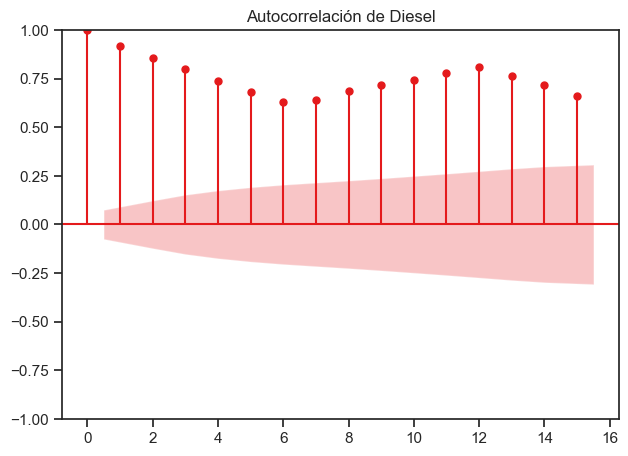

📈 Gráfico de Autocorrelación para: Regular


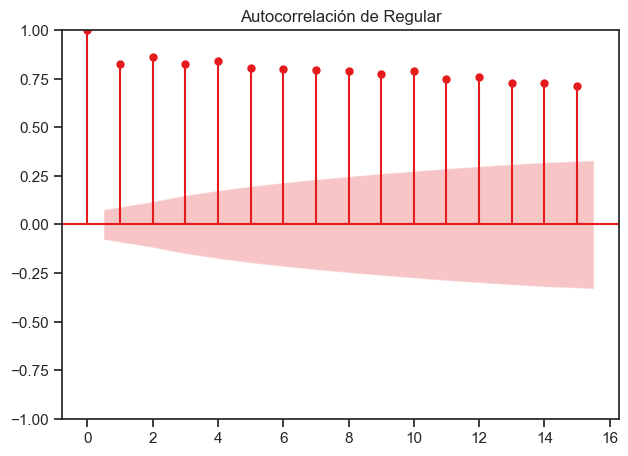

📈 Gráfico de Autocorrelación para: Superior


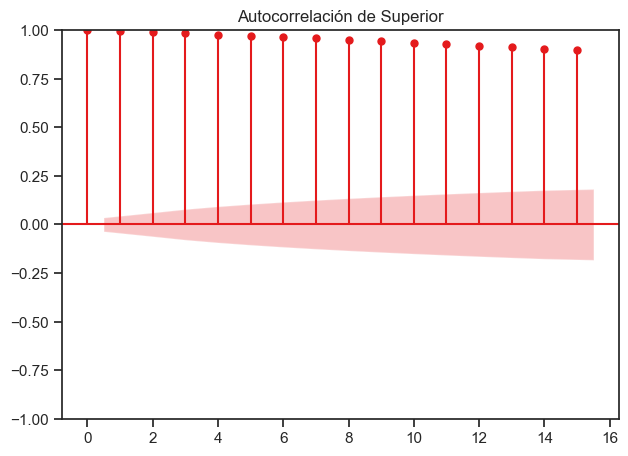

In [50]:
def graficarACF(serieTiempo, descripcion):
    print(f"📈 Gráfico de Autocorrelación para: {descripcion}")
    plot_acf(serieTiempo, lags=15, alpha=0.2)
    plt.title(f'Autocorrelación de {descripcion}')
    plt.show()

graficarACF(serieConsumoDiesel['Diesel'], 'Diesel')
graficarACF(serieImportacionRegular['Gasolina regular'], 'Regular')
graficarACF(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')

In [51]:
def pruebaDickeyFuller(serieTiempo, descripcion):
    print(f"📊 Prueba de Dickey-Fuller Aumentada para: {descripcion}")
    resultado = adfuller(serieTiempo)
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print('Valores críticos:')
    for key, value in resultado[4].items():
        print(f'  {key}: {value}')
    print('-----------------------------------------------------')
    return resultado[1] 

print('-----------------------------------------------------')
pruebaDickeyFuller(serieConsumoDiesel['Diesel'], 'Diesel')
pruebaDickeyFuller(serieImportacionRegular['Gasolina regular'], 'Regular')
pruebaDickeyFuller(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')

-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Diesel
Estadístico ADF: 0.14523982117810716
p-valor: 0.9690175028779467
Valores críticos:
  1%: -3.453922368485787
  5%: -2.871918329081633
  10%: -2.5723001147959184
-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Regular
Estadístico ADF: 0.8288289928204905
p-valor: 0.992087554110633
Valores críticos:
  1%: -3.4547128138328875
  5%: -2.8722649771800155
  10%: -2.5724850011573914
-----------------------------------------------------
📊 Prueba de Dickey-Fuller Aumentada para: Superior
Estadístico ADF: -2.9399220843939617
p-valor: 0.040898674582741115
Valores críticos:
  1%: -3.435401880796999
  5%: -2.863770985550096
  10%: -2.567957791647768
-----------------------------------------------------


0.040898674582741115

In [52]:

def detectar_valores_invalidos(serieTemporal, descripcion):
    # Contar valores NaN
    n_nan = serieTemporal.isna().sum()
    # Contar valores no positivos
    n_no_positivos = (serieTemporal <= 0).sum()

    print(f"🔍 Detección de valores inválidos en la serie: {descripcion}")
    print(f"  Valores NaN: {n_nan}")
    print(f"  Valores no positivos: {n_no_positivos}")
    
    # Eliminar valores NaN
    serieTemporal_sin_nan = serieTemporal.dropna()
    print(f"  Serie temporal sin valores NaN tiene {len(serieTemporal_sin_nan)} elementos.")
    
    return serieTemporal_sin_nan, n_nan, n_no_positivos

# Ejemplo de uso:
serieTemporal_sin_nan, n_nan, n_no_positivos = detectar_valores_invalidos(serieConsumoDiesel, 'Diesel')

# Si necesitas visualizar la serie temporal después de eliminar NaN
print("\nSerie temporal después de eliminar valores NaN:")
print(serieTemporal_sin_nan)

🔍 Detección de valores inválidos en la serie: Diesel
  Valores NaN: Diesel    0
dtype: int64
  Valores no positivos: Diesel    0
dtype: int64
  Serie temporal sin valores NaN tiene 293 elementos.

Serie temporal después de eliminar valores NaN:
                Diesel    
Fecha                     
2000-01-01       634667.06
2000-02-01       642380.66
2000-03-01       699807.25
2000-04-01       586803.98
2000-05-01        656948.2
2000-06-01       570919.88
2000-07-01       576436.02
2000-08-01       593770.77
2000-09-01        590145.4
2000-10-01       641113.36
2000-11-01        657086.3
2000-12-01       673282.26
2001-01-01   569328.787024
2001-02-01   597749.831786
2001-03-01   736085.973214
2001-04-01   606257.658929
2001-05-01     664082.6575
2001-06-01    559333.03369
2001-07-01   589452.734643
2001-08-01   568546.374643
2001-09-01   533108.394643
2001-10-01   603371.184643
2001-11-01   626156.184643
2001-12-01   664190.184643
2002-01-01   726672.599167
2002-02-01   694344.779167

🔍 Analizando la serie: Diesel
🔍 Detección de valores inválidos en la serie: Diesel
  Valores NaN: 0
  Valores no positivos: 0
  Serie temporal sin valores NaN tiene 293 elementos.
📊 Prueba de Dickey-Fuller Aumentada para: Diesel
Estadístico ADF: -0.44918144412882166
p-valor: 0.901557753919378
Valores críticos:
  1%: -3.453922368485787
  5%: -2.871918329081633
  10%: -2.5723001147959184
-----------------------------------------------------
🔄 Aplicando diferenciación a Diesel. Intento 1.
📊 Prueba de Dickey-Fuller Aumentada para: Diesel
Estadístico ADF: -6.9885899777221345
p-valor: 7.851113111171977e-10
Valores críticos:
  1%: -3.453922368485787
  5%: -2.871918329081633
  10%: -2.5723001147959184
-----------------------------------------------------
🔄 Aplicando diferenciación a Diesel. Intento 2.
📊 Prueba de Dickey-Fuller Aumentada para: Diesel
Estadístico ADF: -9.126568304562161
p-valor: 3.1021697475811376e-15
Valores críticos:
  1%: -3.454355055831705
  5%: -2.8721080938842976
  10%: -2

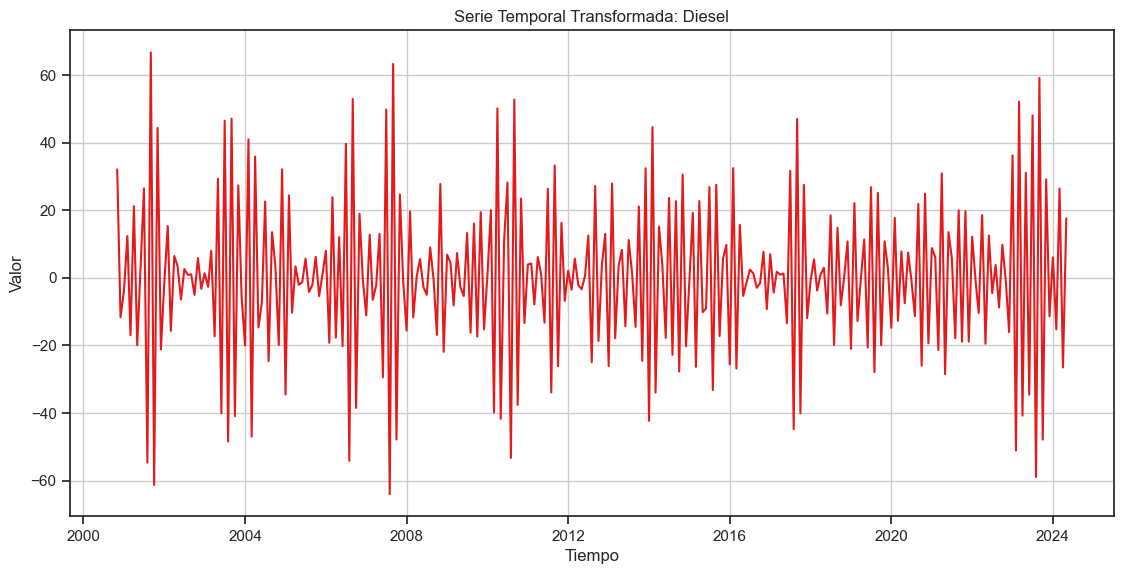

--------------------------------------------------------------------------------------------------------
🔍 Analizando la serie: Regular
🔍 Detección de valores inválidos en la serie: Regular
  Valores NaN: 0
  Valores no positivos: 0
  Serie temporal sin valores NaN tiene 281 elementos.
📊 Prueba de Dickey-Fuller Aumentada para: Regular
Estadístico ADF: -0.044242726405899914
p-valor: 0.9547166884951503
Valores críticos:
  1%: -3.4550813975770827
  5%: -2.8724265892710914
  10%: -2.5725712007462582
-----------------------------------------------------
🔄 Aplicando diferenciación a Regular. Intento 1.
📊 Prueba de Dickey-Fuller Aumentada para: Regular
Estadístico ADF: -7.77716829597593
p-valor: 8.607670489056085e-12
Valores críticos:
  1%: -3.4550813975770827
  5%: -2.8724265892710914
  10%: -2.5725712007462582
-----------------------------------------------------
🔄 Aplicando diferenciación a Regular. Intento 2.
📊 Prueba de Dickey-Fuller Aumentada para: Regular
Estadístico ADF: -10.490334936

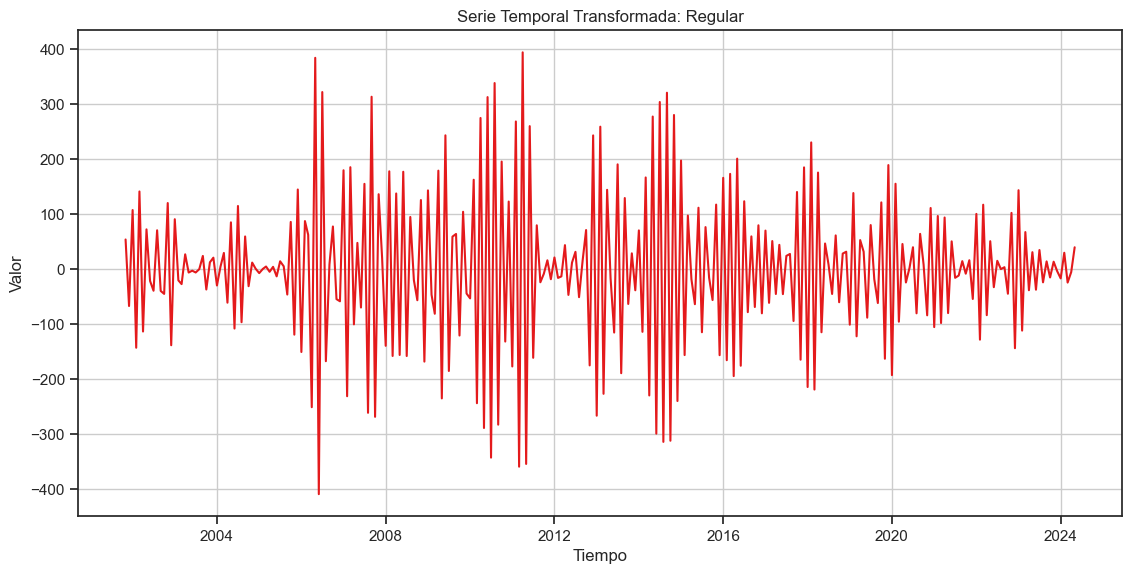

--------------------------------------------------------------------------------------------------------
🔍 Analizando la serie: Superior
🔍 Detección de valores inválidos en la serie: Superior
  Valores NaN: 0
  Valores no positivos: 0
  Serie temporal sin valores NaN tiene 1305 elementos.
📊 Prueba de Dickey-Fuller Aumentada para: Superior
Estadístico ADF: -3.1808885678115097
p-valor: 0.021117919557505475
Valores críticos:
  1%: -3.435401880796999
  5%: -2.863770985550096
  10%: -2.567957791647768
-----------------------------------------------------
🔄 Aplicando diferenciación a Superior. Intento 1.
📊 Prueba de Dickey-Fuller Aumentada para: Superior
Estadístico ADF: -9.560298586241815
p-valor: 2.436091753573115e-16
Valores críticos:
  1%: -3.435401880796999
  5%: -2.863770985550096
  10%: -2.567957791647768
-----------------------------------------------------
🔄 Aplicando diferenciación a Superior. Intento 2.
📊 Prueba de Dickey-Fuller Aumentada para: Superior
Estadístico ADF: -12.012324

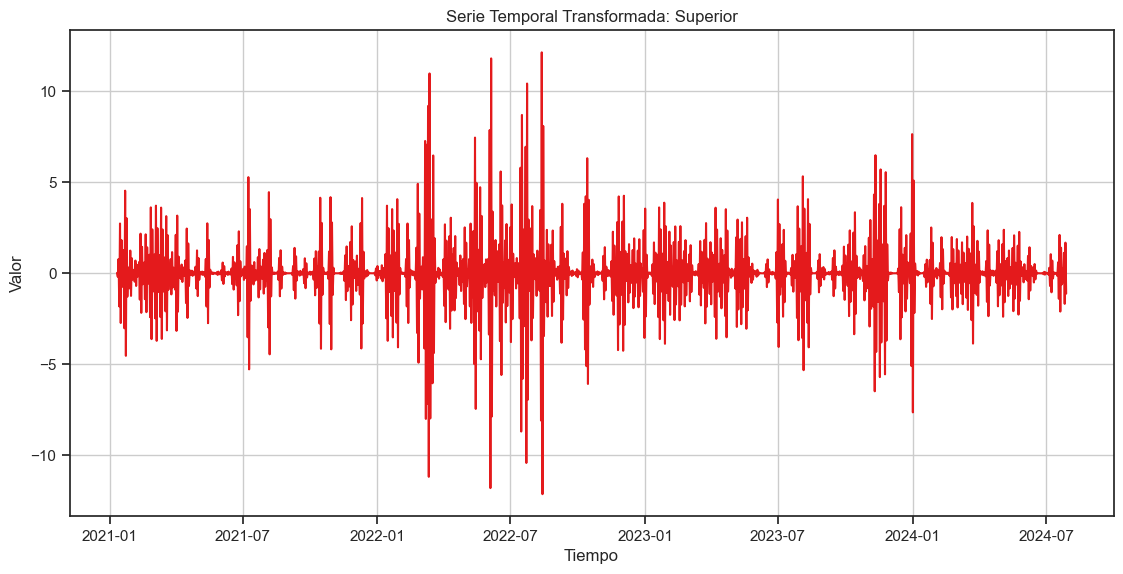

FECHA
2021-01-11    0.021671
2021-01-12   -0.195041
2021-01-13    0.780166
2021-01-14   -1.820387
2021-01-15    2.730581
                ...   
2024-07-24   -0.496552
2024-07-25    1.119677
2024-07-26   -1.679516
2024-07-27    1.679516
2024-07-28   -1.119677
Name: Superior GTQ/GALON, Length: 1295, dtype: float64

In [53]:
def detectar_valores_invalidos(serieTemporal, descripcion):
    serieTemporal = pd.to_numeric(serieTemporal, errors='coerce')  # Convertir a numérico y forzar NaN si hay errores
    n_nan = serieTemporal.isna().sum()
    n_no_positivos = (serieTemporal <= 0).sum()

    print(f"🔍 Detección de valores inválidos en la serie: {descripcion}")
    print(f"  Valores NaN: {n_nan}")
    print(f"  Valores no positivos: {n_no_positivos}")
    
    serieTemporal_sin_nan = serieTemporal.dropna()
    print(f"  Serie temporal sin valores NaN tiene {len(serieTemporal_sin_nan)} elementos.")
    
    return serieTemporal_sin_nan, n_nan, n_no_positivos

def varianza_estable(serieTemporal):
    n = len(serieTemporal)
    partes = np.array_split(serieTemporal, 3)
    varianzas = [np.var(parte) for parte in partes]
    return np.allclose(varianzas[0], varianzas[1], rtol=0.1) and np.allclose(varianzas[1], varianzas[2], rtol=0.1)

def aplicar_transformacion_logaritmica(serieTemporal):
    if (serieTemporal > 0).all():
        return np.log(serieTemporal)
    else:
        print("⚠️ La serie contiene valores no positivos, no se puede aplicar la transformación logarítmica.")
        return serieTemporal

def analizar_y_transformar_serie(serieTemporal, descripcion):
    print(f"🔍 Analizando la serie: {descripcion}")
    
    serieTemporal, n_nan, n_no_positivos = detectar_valores_invalidos(serieTemporal, descripcion)
    
    estacionaria = False
    intentos = 0
    max_intentos = 10

    serieTemporal = aplicar_transformacion_logaritmica(serieTemporal)
    
    while not estacionaria and intentos < max_intentos:
        intentos += 1
        p_valor = pruebaDickeyFuller(serieTemporal, descripcion)
        if p_valor < 0.05 and varianza_estable(serieTemporal):
            estacionaria = True
            print(f"✅ La serie {descripcion} es estacionaria en media y varianza.")
            break
        serieTemporal = serieTemporal.diff().dropna()
        print(f"🔄 Aplicando diferenciación a {descripcion}. Intento {intentos}.")
    
    if not estacionaria:
        print(f"⚠️ No se pudo hacer la serie {descripcion} estacionaria después de {max_intentos} intentos.")
        print("📈 Utilizando un modelo ARIMA para tratar con la no estacionariedad.")
        modelo_arima = ARIMA(serieTemporal, order=(1, 1, 1))
        modelo_arima_fit = modelo_arima.fit()
        print(modelo_arima_fit.summary())

    plt.figure(figsize=(12, 6))
    plt.plot(serieTemporal)
    plt.title(f'Serie Temporal Transformada: {descripcion}')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.grid()
    plt.show()
    
    return serieTemporal

# Asegúrate de que estas variables estén definidas correctamente
# Reemplaza con tus series temporales reales
analizar_y_transformar_serie(serieConsumoDiesel['Diesel'], 'Diesel')
print("--------------------------------------------------------------------------------------------------------")
analizar_y_transformar_serie(serieImportacionRegular['Gasolina regular'], 'Regular')
print("--------------------------------------------------------------------------------------------------------")
analizar_y_transformar_serie(seriePreciosSuper['Superior GTQ/GALON'], 'Superior')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7447.955, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7440.658, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7440.979, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7446.248, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7442.638, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7442.627, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7444.623, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7439.163, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7441.126, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7441.116, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7439.504, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7443.087, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.717 seconds
                           

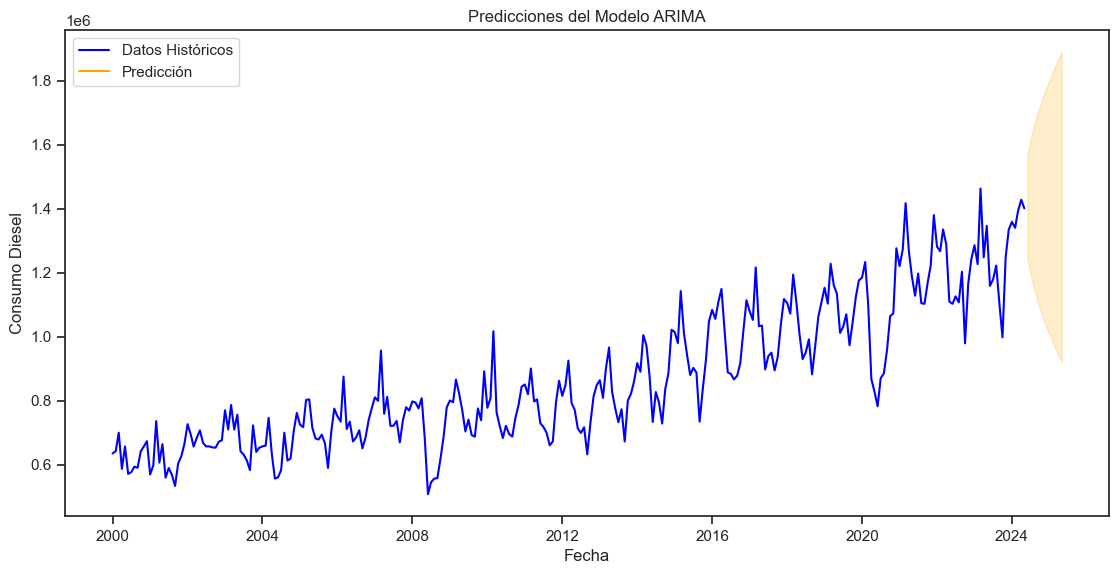

In [54]:
serie_diesel = serieConsumoDiesel['Diesel']

# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(serie_diesel,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())

# Realizar predicciones
n_periodos = 12  # Número de períodos a predecir (por ejemplo, 12 meses)
predicciones, errores = modelo_auto.predict(n_periods=n_periodos, return_conf_int=True)

# Crear un DataFrame para las predicciones
fechas_futuras = pd.date_range(start=serie_diesel.index[-1] + pd.Timedelta(days=1), periods=n_periodos, freq='M')
df_predicciones = pd.DataFrame(predicciones, index=fechas_futuras, columns=['Predicción'])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(serie_diesel, label='Datos Históricos', color='blue')
plt.plot(df_predicciones, label='Predicción', color='orange')
plt.fill_between(fechas_futuras, errores[:, 0], errores[:, 1], color='orange', alpha=0.2)
plt.title('Predicciones del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo Diesel')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7193.005, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7412.355, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7264.099, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7230.431, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7410.471, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7201.550, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7200.752, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7193.700, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7195.543, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7198.250, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7200.602, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7199.638, Time=0.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7189.517, Time=0.41 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

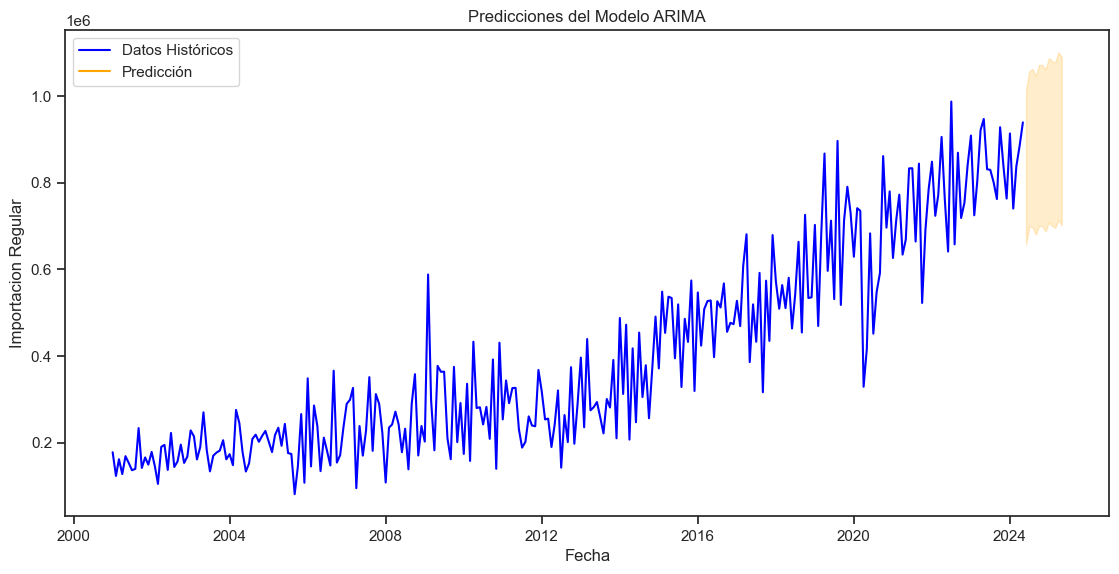

In [55]:
serie_regular = serieImportacionRegular['Gasolina regular']

# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(serie_regular,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())

# Realizar predicciones
n_periodos = 12  # Número de períodos a predecir (por ejemplo, 12 meses)
predicciones, errores = modelo_auto.predict(n_periods=n_periodos, return_conf_int=True)

# Crear un DataFrame para las predicciones
fechas_futuras = pd.date_range(start=serie_regular.index[-1] + pd.Timedelta(days=1), periods=n_periodos, freq='M')
df_predicciones = pd.DataFrame(predicciones, index=fechas_futuras, columns=['Predicción'])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(serie_regular, label='Datos Históricos', color='blue')
plt.plot(df_predicciones, label='Predicción', color='orange')
plt.fill_between(fechas_futuras, errores[:, 0], errores[:, 1], color='orange', alpha=0.2)
plt.title('Predicciones del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Importacion Regular')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=773.104, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=774.698, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=776.697, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=776.697, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=773.556, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=779.616, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=770.964, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=778.676, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=777.650, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=781.620, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=779.621, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=771.049, Time=1.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=769.409, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=769.647, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=776.4

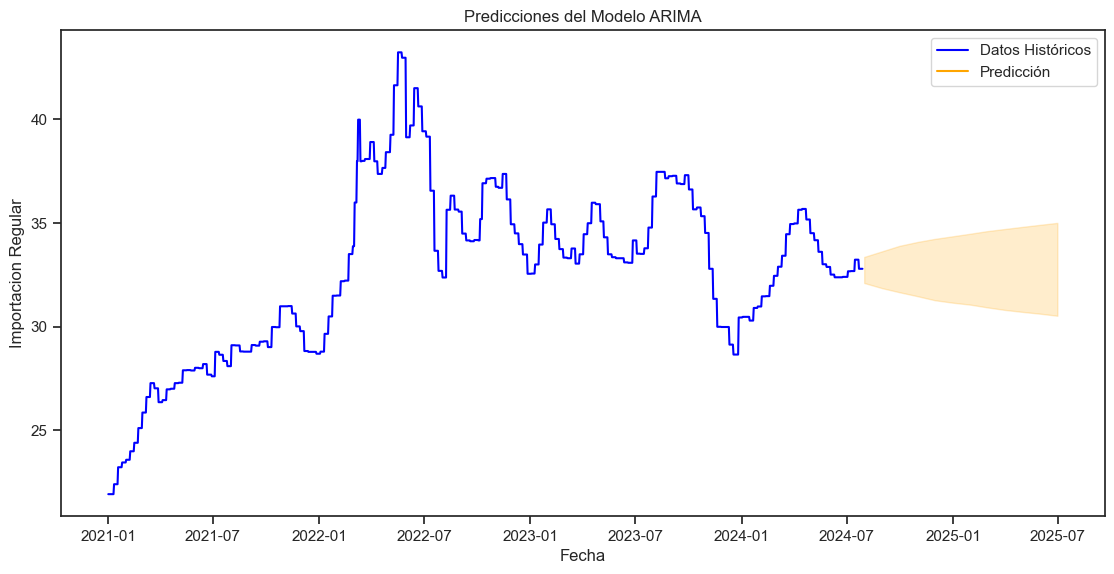

In [56]:
serie_super = seriePreciosSuper['Superior GTQ/GALON']

# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(serie_super,
                          seasonal=False,  # Si no es estacional
                          stepwise=True,   # Si utilizar pasos para encontrar el mejor modelo
                          trace=True)      # Mostrar el progreso

# Resumen del modelo
print(modelo_auto.summary())

# Realizar predicciones
n_periodos = 12  # Número de períodos a predecir (por ejemplo, 12 meses)
predicciones, errores = modelo_auto.predict(n_periods=n_periodos, return_conf_int=True)

# Crear un DataFrame para las predicciones
fechas_futuras = pd.date_range(start=serie_super.index[-1] + pd.Timedelta(days=1), periods=n_periodos, freq='M')
df_predicciones = pd.DataFrame(predicciones, index=fechas_futuras, columns=['Predicción'])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(serie_super, label='Datos Históricos', color='blue')
plt.plot(df_predicciones, label='Predicción', color='orange')
plt.fill_between(fechas_futuras, errores[:, 0], errores[:, 1], color='orange', alpha=0.2)
plt.title('Predicciones del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Importacion Regular')
plt.legend()
plt.show()

11:29:28 - cmdstanpy - INFO - Chain [1] start processing
11:29:29 - cmdstanpy - INFO - Chain [1] done processing


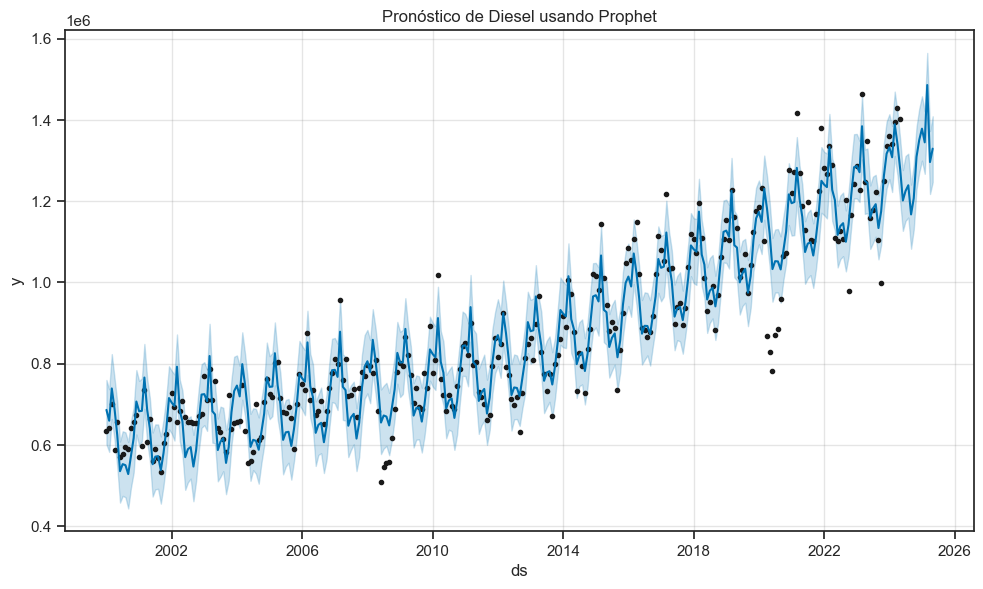

11:29:29 - cmdstanpy - INFO - Chain [1] start processing
11:29:29 - cmdstanpy - INFO - Chain [1] done processing


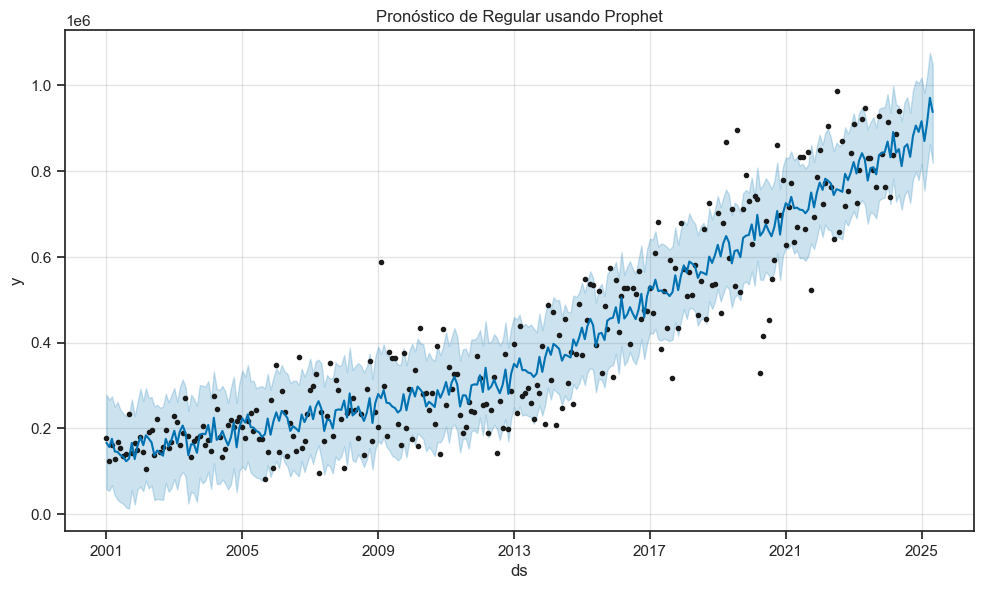

11:29:29 - cmdstanpy - INFO - Chain [1] start processing
11:29:30 - cmdstanpy - INFO - Chain [1] done processing


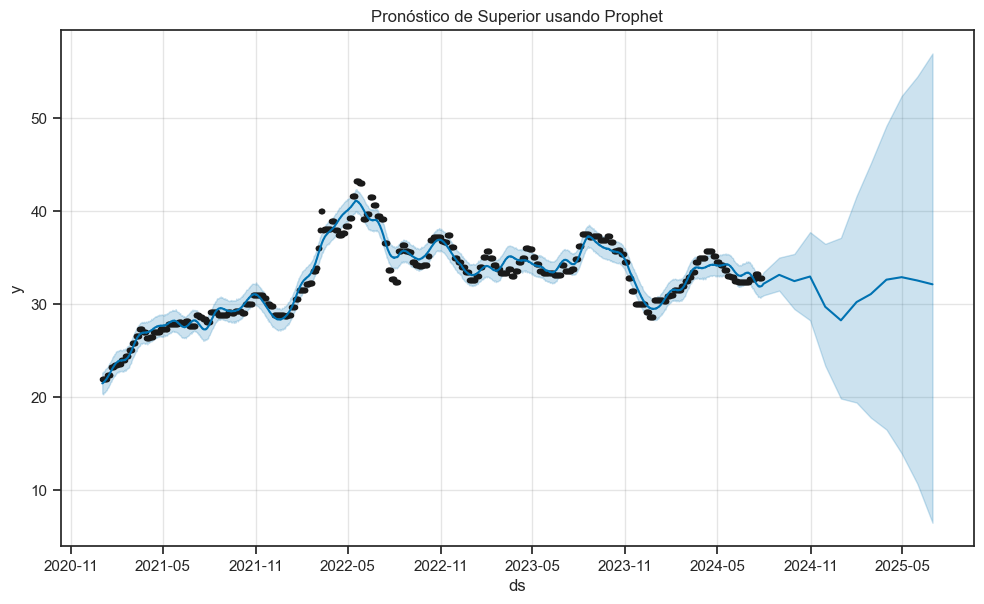

In [57]:
def entrenarProphet(serieTiempo, nombre_variable):
    # Preparar los datos
    df_prophet = serieTiempo.reset_index()
    df_prophet.columns = ['ds', 'y']

    # Crear y ajustar el modelo Prophet
    modelo = Prophet()
    modelo.fit(df_prophet)

    # Hacer predicciones
    futuro = modelo.make_future_dataframe(periods=12, freq='M')  # Cambia el número y la frecuencia según tus necesidades
    pronostico = modelo.predict(futuro)

    # Graficar resultados
    modelo.plot(pronostico)
    plt.title(f'Pronóstico de {nombre_variable} usando Prophet')
    plt.show()

# Entrenar el modelo para el Diesel
entrenarProphet(serieConsumoDiesel[['Diesel']], 'Diesel')
entrenarProphet(serieImportacionRegular[['Gasolina regular']], 'Regular')
entrenarProphet(seriePreciosSuper[['Superior GTQ/GALON']], 'Superior')